In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
name_mapper = {'SVR': 'SVM', 
               'RandomForestRegressor': 'RF', 
               'AdaBoostRegressor': 'AdaBoost', 
               'GradientBoostingRegressor': 'GradientBoosting', 
               'BaggingRegressor': 'Bagging',
               'MLPRegressor': 'MLP (Neural Net)',
               'Euclidean Distance': 'Euclidean',
               'Pearson Correlation': 'Pearson',
               'Jaccard Index': 'Jaccard'
              }

In [3]:
styles = {'SVM': ['red', 'o', (0, (1, 1))], 'BayesianRidge': ['green', 'v', (0, (1, 1))], 
          'Lasso': ['blue', 'p', (0, (1, 1))], 'Ridge': ['cyan', 's', (0, (5, 10))], 
          'Bagging': ['orange', 'D', (0, (5, 5))], 'AdaBoost': ['violet', 'x', (0, (5, 1))], 
          'RF': ['magenta', 'd', (0, (3, 10, 1, 10))], 'GradientBoosting': ['olive', '8', (0, (3, 5, 1, 5))], 
          'MLP (Neural Net)': ['brown', '*', (0, (5, 1))],
          'Euclidean Distance (user-based)': ['yellow', 'H', (0, (3, 1, 1, 1))], 
          'Euclidean Distance (item-based)': ['black', '<', (0, (3, 5, 1, 5, 1, 5))], 
          'Pearson Correlation (user-based)': ['gray', '>', (0, (3, 10, 1, 10, 1, 10))], 
          'Pearson Correlation (item-based)': ['teal', '^', (0, (3, 1, 1, 1, 1, 1))], 
          'Jaccard Index (user-based)': ['lawngreen', 'P', 'solid'], 
          'Jaccard Index (item-based)': ['deeppink', '*', 'dashdot'],
          'Euclidean': ['#1f77b4', 'o', '-'],  
          'Jaccard':      ['#2ca02c', 's', '--'], 
          'Pearson':['#d62728', '^', '-.']}

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

def plot_cluster_group(
    data_dict,
    title_suffix,
    name_mapper,
    styles,
    stats_data,
    tag
):
    fig, axs = plt.subplots(2, 1, figsize=(5.5, 6.5), sharex=True)

    for model in data_dict:
        cluster_counts = sorted(data_dict[model].keys())

        means_rmse, sems_rmse = [], []
        means_mae,  sems_mae  = [], []

        for num_cluster in cluster_counts:
            temp_rmse, temp_mae = [], []

            for n_training_sem in data_dict[model][num_cluster]:
                y_true = data_dict[model][num_cluster][n_training_sem]['y_true']
                y_pred = data_dict[model][num_cluster][n_training_sem]['y_pred']

                temp_rmse.append(np.sqrt(mean_squared_error(y_true, y_pred)))
                temp_mae.append(mean_absolute_error(y_true, y_pred))

            # --- stats data (for tests later) ---
            stats_key = f"{model}_{tag}_k{num_cluster}"
            stats_data[stats_key] = {
                'rmse': temp_rmse,
                'mae': temp_mae
            }

            # --- mean ± SEM ---
            means_rmse.append(np.mean(temp_rmse))
            means_mae.append(np.mean(temp_mae))

            sems_rmse.append(np.std(temp_rmse, ddof=1) / np.sqrt(len(temp_rmse)))
            sems_mae.append(np.std(temp_mae,  ddof=1) / np.sqrt(len(temp_mae)))

        lbl = name_mapper.get(model, model)
        style_key = name_mapper.get(model, model) 
        style = styles.get(style_key, ['black', 'o', '-'])


        x = np.arange(len(cluster_counts))

        axs[0].errorbar(
            x, means_rmse, yerr=sems_rmse,
            label=lbl,
            color=style[0],
            marker=style[1],
            linestyle=style[2],
            linewidth=1.2,
            ms=2.5,
            capsize=2,
            elinewidth=0.9,
            alpha=0.8
        )


        axs[1].errorbar(
            x, means_mae, yerr=sems_mae,
            label=lbl,
            color=style[0],
            marker=style[1],
            linestyle=style[2],
            linewidth=1.2,
            ms=2.5,
            capsize=2,
            elinewidth=0.9,
            alpha=0.8
        )


    # --- axes styling ---
    axs[0].set_ylabel("RMSE", fontfamily='serif', fontsize=11)
    axs[1].set_ylabel("MAE",  fontfamily='serif', fontsize=11)
    axs[1].set_xlabel("Number of Clusters (k)", fontfamily='serif', fontsize=11)

    axs[1].set_xticks(np.arange(len(cluster_counts)))
    axs[1].set_xticklabels([f"k={k}" for k in cluster_counts],
                           fontfamily='serif', fontsize=11)

    for ax in axs:
        ax.grid(axis='y')
        ax.tick_params(axis="both", which="both", length=0)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)

    axs[0].set_title(title_suffix, fontfamily='serif', fontsize=12)
    axs[1].legend(
        prop={'family': 'serif', 'size': 10},
        loc='center left',
        bbox_to_anchor=(1.02, 0.5),
        frameon=False
    )


    plt.tight_layout()
    return fig

In [6]:
def split_dict(d, n_parts):
    items = list(d.items())
    return [
        dict(items[i::n_parts])
        for i in range(n_parts)
    ]

### Baseline:

In [37]:
with open('../results/baseline_regression_results.json') as fr:
    baseline_reg = json.load(fr)    

In [38]:
with open('../results/baseline_collaborative_filtering_results (user-based).json') as fr:
    baseline_cb_user = json.load(fr)    

In [39]:
with open('../results/baseline_collaborative_filtering_results (item-based).json') as fr:
    baseline_cb_item = json.load(fr)    

In [19]:
def plot_baseline(reg, cb_user, cb_item):
    fig, axs = plt.subplots(2, 1, figsize=(5.5, 5.89286), sharex=True)
    
    for model in baseline_reg:
        error = {'rmse': [], 'mae': []}
        for n_training_sem in sorted(baseline_reg[model]):
            error['rmse'].append(baseline_reg[model][n_training_sem]['rmse'][1])
            error['mae'].append(baseline_reg[model][n_training_sem]['mae'][1])
        
        if model in name_mapper:
            model = name_mapper[model]
        
        axs[0].plot(np.arange(7), error['rmse'], label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=1, ms=3, color=styles[model][0])
        axs[1].plot(np.arange(7), error['mae'], label=model, linestyle=styles[model][2], marker=styles[model][1], linewidth=1, ms=3, color=styles[model][0])
    
    for model in cb_user:
        if model in name_mapper:
            model_legend = name_mapper[model] + 'User'
        
        model_label = model + ' (user-based)'
        axs[0].plot(np.arange(7), cb_user[model]['rmse'], label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
        axs[1].plot(np.arange(7), cb_user[model]['mae'], label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
    
    for model in cb_item:
        if model in name_mapper:
            model_legend = name_mapper[model] + 'Item'
        
        model_label = model + ' (item-based)'
        axs[0].plot(np.arange(7), cb_item[model]['rmse'], label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
        axs[1].plot(np.arange(7), cb_item[model]['mae'], label=model_legend, linestyle=styles[model_label][2], marker=styles[model_label][1], linewidth=1, ms=3, color=styles[model_label][0])
    
    axs[0].set_ylabel('RMSE', fontfamily='serif', fontsize=11)
    axs[1].set_ylabel('MAE', fontfamily='serif', fontsize=11)
    axs[1].set_xlabel('Number of Training Semesters', fontfamily='serif', fontsize=11)

    axs[0].set_yticks(np.arange(0.8, 2.5, 0.1))
    axs[1].set_yticks(np.arange(0.5, 2.1, 0.1))
    axs[0].set_yticklabels([round(i,1) for i in np.arange(0.8, 2.5, 0.1)], fontfamily='serif', fontsize=11)
    axs[1].set_yticklabels([round(i,1) for i in np.arange(0.5, 2.1, 0.1)], fontfamily='serif', fontsize=11)
    axs[1].set_xticks(np.arange(7))
    axs[1].set_xticklabels(['N={}'.format(i+1) for i in range(7)], fontsize=11, fontfamily='serif')
    
    axs[0].tick_params(axis = "x", which = "both", bottom = False, top = False)
    axs[0].tick_params(axis = "y", which = "both", left = False, right = False)
    axs[1].tick_params(axis = "x", which = "both", bottom = False, top = False)
    axs[1].tick_params(axis = "y", which = "both", left = False, right = False)
    plt.subplots_adjust(hspace=.05)
    axs[1].legend(prop={'size': 10, 'family': 'serif'}, loc='right', bbox_to_anchor=(1.44, 1), ncol=1)
    right_side = axs[0].spines["right"]
    right_side.set_visible(False)
    left_side = axs[0].spines["left"]
    left_side.set_visible(False)
    top_side = axs[0].spines["top"]
    top_side.set_visible(False)
    right_side = axs[1].spines["right"]
    right_side.set_visible(False)
    left_side = axs[1].spines["left"]
    left_side.set_visible(False)
    top_side = axs[1].spines["top"]
    top_side.set_visible(False)
    axs[0].grid(axis='y')
    axs[1].grid(axis='y')

    plt.savefig('error_baseline.eps', bbox_inches='tight', dpi=1200)

In [40]:
# ayri cizim fonksiyonu 
def plot_baseline_separate(reg, cb_user, cb_item, metric='rmse', suffix=''):
    """
    metric: 'rmse' veya 'mae'
    Y eksenini veriye göre otomatik (dinamik) ayarlar.
    """
    fig, ax = plt.subplots(figsize=(6, 5), dpi=300)
    
    # Tüm değerleri burada toplayacağız (Min/Max hesabı için)
    all_values = []

    # --- 1. REGRESYON MODELLERİ ---
    for model in reg:
        error_list = []
        # Bazı modellerde her dönem olmayabilir, kontrol ederek alalım
        sorted_sems = sorted(reg[model].keys())
        
        # X ekseni (Dönem sayısı)
        x_axis = np.arange(len(sorted_sems))
        
        for n_training_sem in sorted_sems:
            val = reg[model][n_training_sem][metric][1] # Index 1: Test Hatası
            error_list.append(val)
        
        # Listeyi genel havuza ekle
        all_values.extend(error_list)

        display_name = name_mapper.get(model, model)
        
        if display_name in styles:
            s = styles[display_name]
            ax.plot(x_axis, error_list, label=display_name, 
                    linestyle=s[2], marker=s[1], linewidth=1.5, ms=5, color=s[0])
        else:
            ax.plot(x_axis, error_list, label=display_name, linewidth=1.5, ms=5)

    # --- 2. USER-BASED CF ---
    for model in cb_user:
        display_name = name_mapper.get(model, model) + ' User'
        style_key = model + ' (user-based)'
        
        data_list = cb_user[model][metric]
        all_values.extend(data_list) # Havuza ekle
        
        if style_key in styles:
            s = styles[style_key]
            ax.plot(np.arange(len(data_list)), data_list, label=display_name, 
                    linestyle=s[2], marker=s[1], linewidth=1.5, ms=5, color=s[0])
        else:
            ax.plot(np.arange(len(data_list)), data_list, label=display_name)

    # --- 3. ITEM-BASED CF ---
    for model in cb_item:
        display_name = name_mapper.get(model, model) + ' Item'
        style_key = model + ' (item-based)'
        
        data_list = cb_item[model][metric]
        all_values.extend(data_list) # Havuza ekle
        
        if style_key in styles:
            s = styles[style_key]
            ax.plot(np.arange(len(data_list)), data_list, label=display_name, 
                    linestyle=s[2], marker=s[1], linewidth=1.5, ms=5, color=s[0])
        else:
            ax.plot(np.arange(len(data_list)), data_list, label=display_name)
    
    # --- DİNAMİK EKSEN AYARLARI (BURASI DEĞİŞTİ) ---
    if all_values:
        y_min = min(all_values)
        y_max = max(all_values)
        
        # %15 üstten ve alttan boşluk bırak
        margin = (y_max - y_min) * 0.15
        if margin == 0: margin = 0.1 # Tek değer varsa hata vermesin
        
        new_ylim_bottom = max(0, y_min - margin) # 0'ın altına inmesin
        new_ylim_top = y_max + margin
        
        ax.set_ylim(new_ylim_bottom, new_ylim_top)
    
    # --- STİL VE ETİKETLER ---
    ax.set_ylabel(metric.upper(), fontfamily='serif', fontsize=12)
    ax.set_xlabel('Number of Training Semesters', fontfamily='serif', fontsize=12)
    
    # X Ekseni Etiketleri
    ax.set_xticks(np.arange(7))
    ax.set_xticklabels(['N={}'.format(i+1) for i in range(7)], fontsize=11, fontfamily='serif')
    
    # Y Ekseni Yazı Tipi (Dinamik oluşan sayıları Serif yapıyoruz)
    import matplotlib.ticker as ticker
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f')) # 2 basamak
    for label in ax.get_yticklabels():
        label.set_fontfamily('serif')
        label.set_fontsize(11)

    # Temiz Görünüm (Spines)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    # Grid ve Tick Ayarları
    ax.grid(axis='y', linestyle='--', alpha=0.5)
    ax.tick_params(axis="both", which="both", bottom=False, top=False, left=False, right=False)

    # Legend (Dışarıya yerleştirme)
    ax.legend(prop={'size': 10, 'family': 'serif'}, loc='upper left', bbox_to_anchor=(1.02, 1), borderaxespad=0)

    # Kaydet
    if suffix:
        output_filename = f'error_baseline_{metric}_{suffix}.eps'
    else:
        output_filename = f'error_baseline_{metric}.eps'
    plt.savefig(output_filename, bbox_inches='tight', dpi=1200)
    plt.show()
    print(f"✅ Grafik kaydedildi: {output_filename}")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


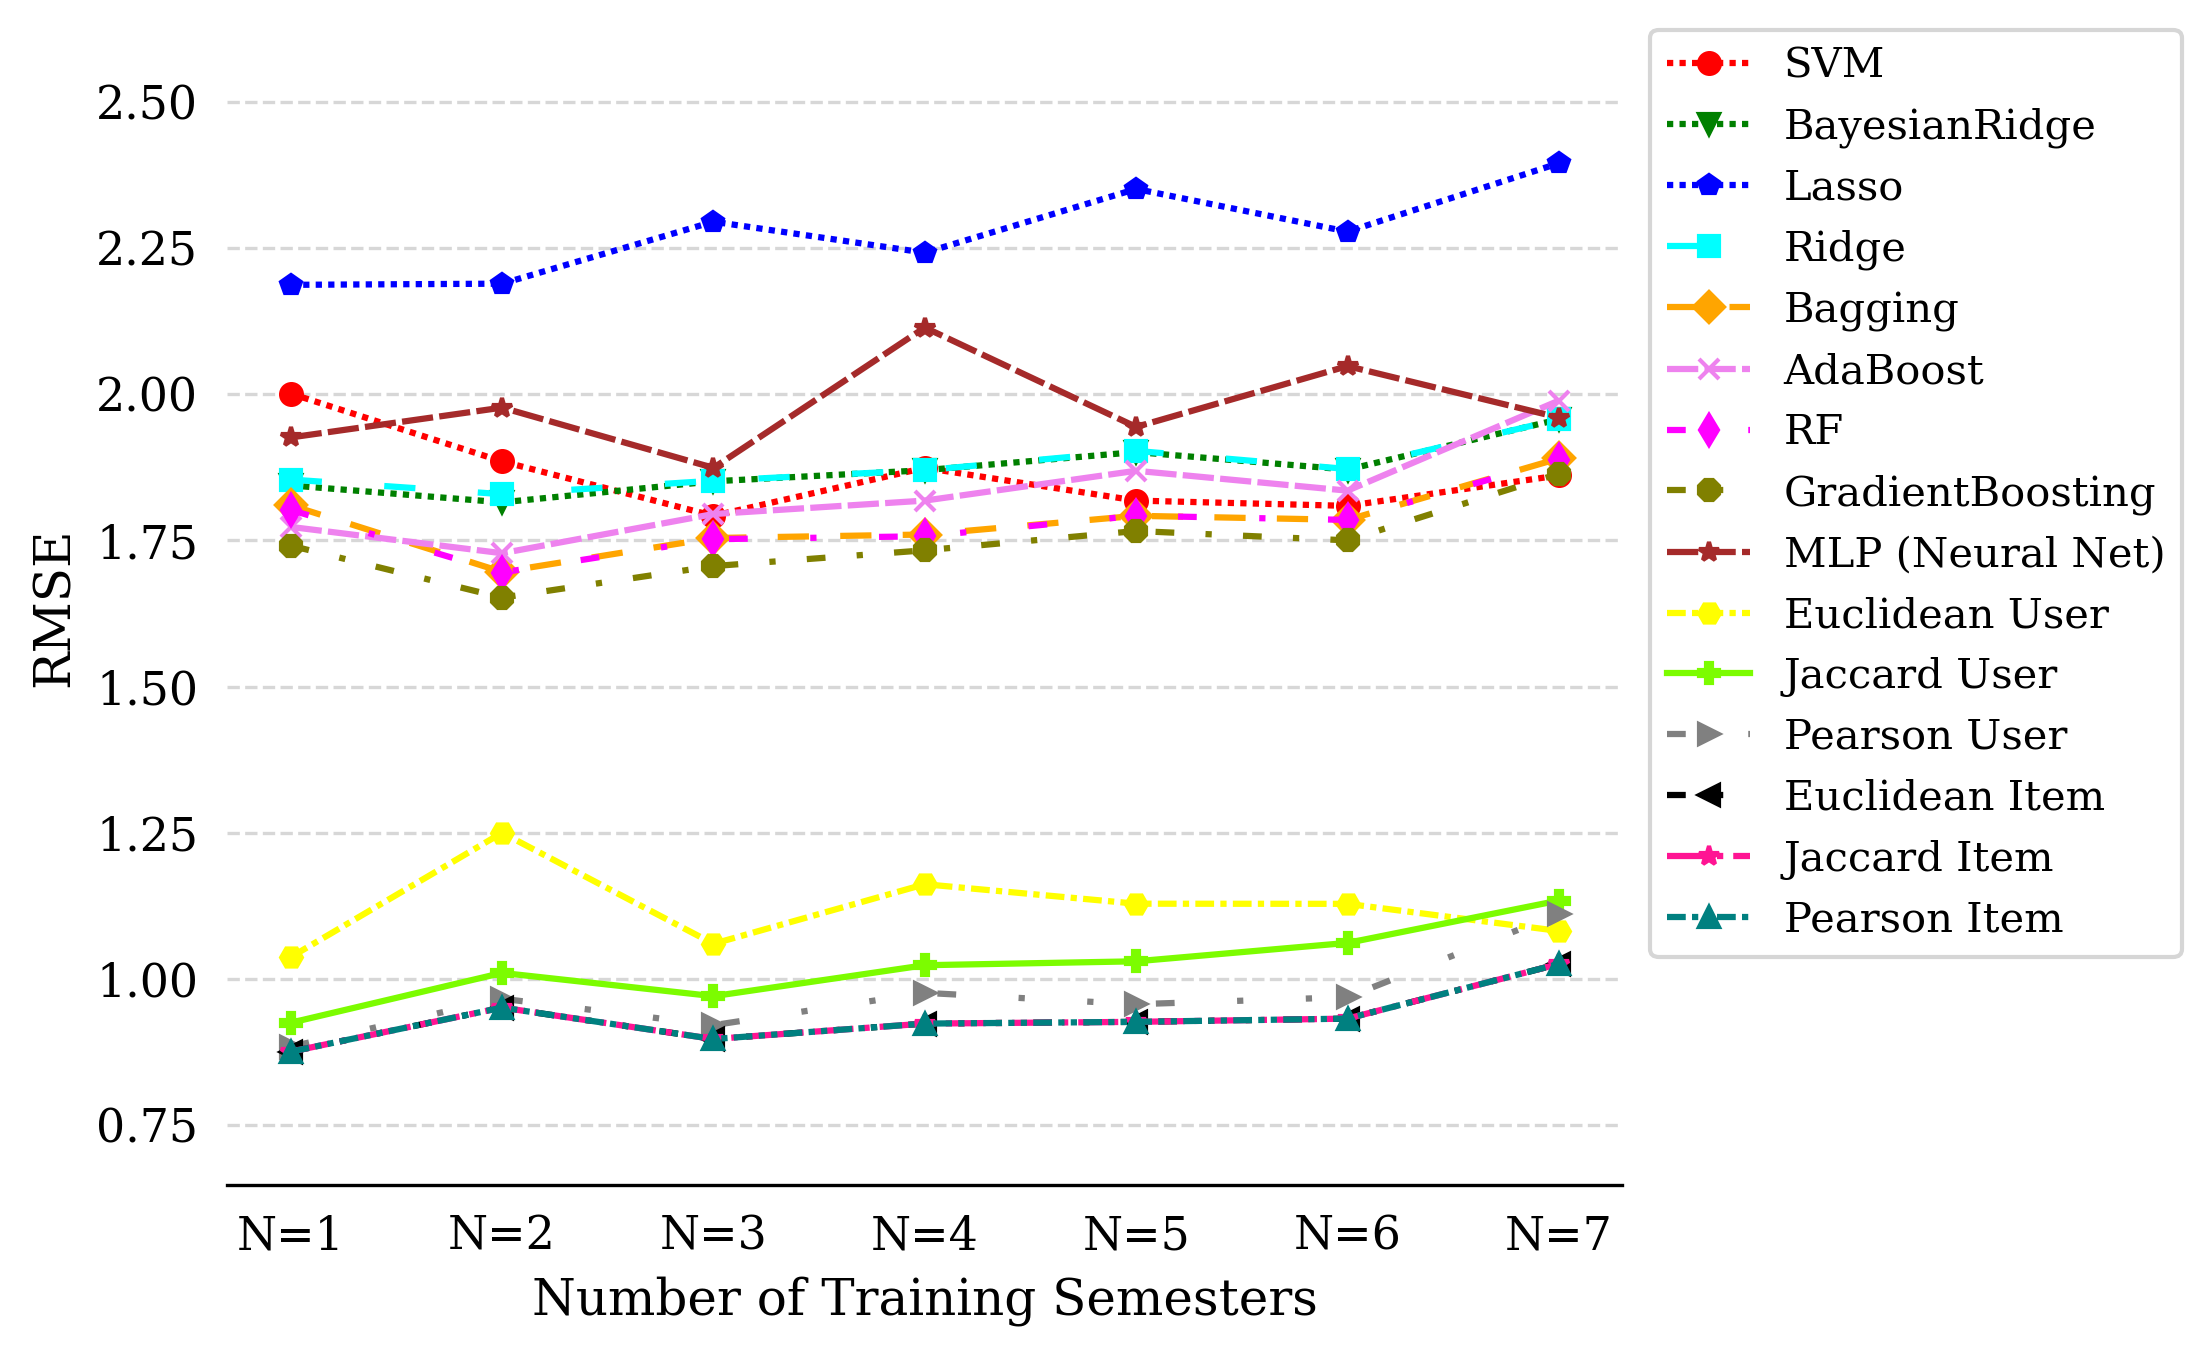

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✅ Grafik kaydedildi: error_baseline_rmse.eps


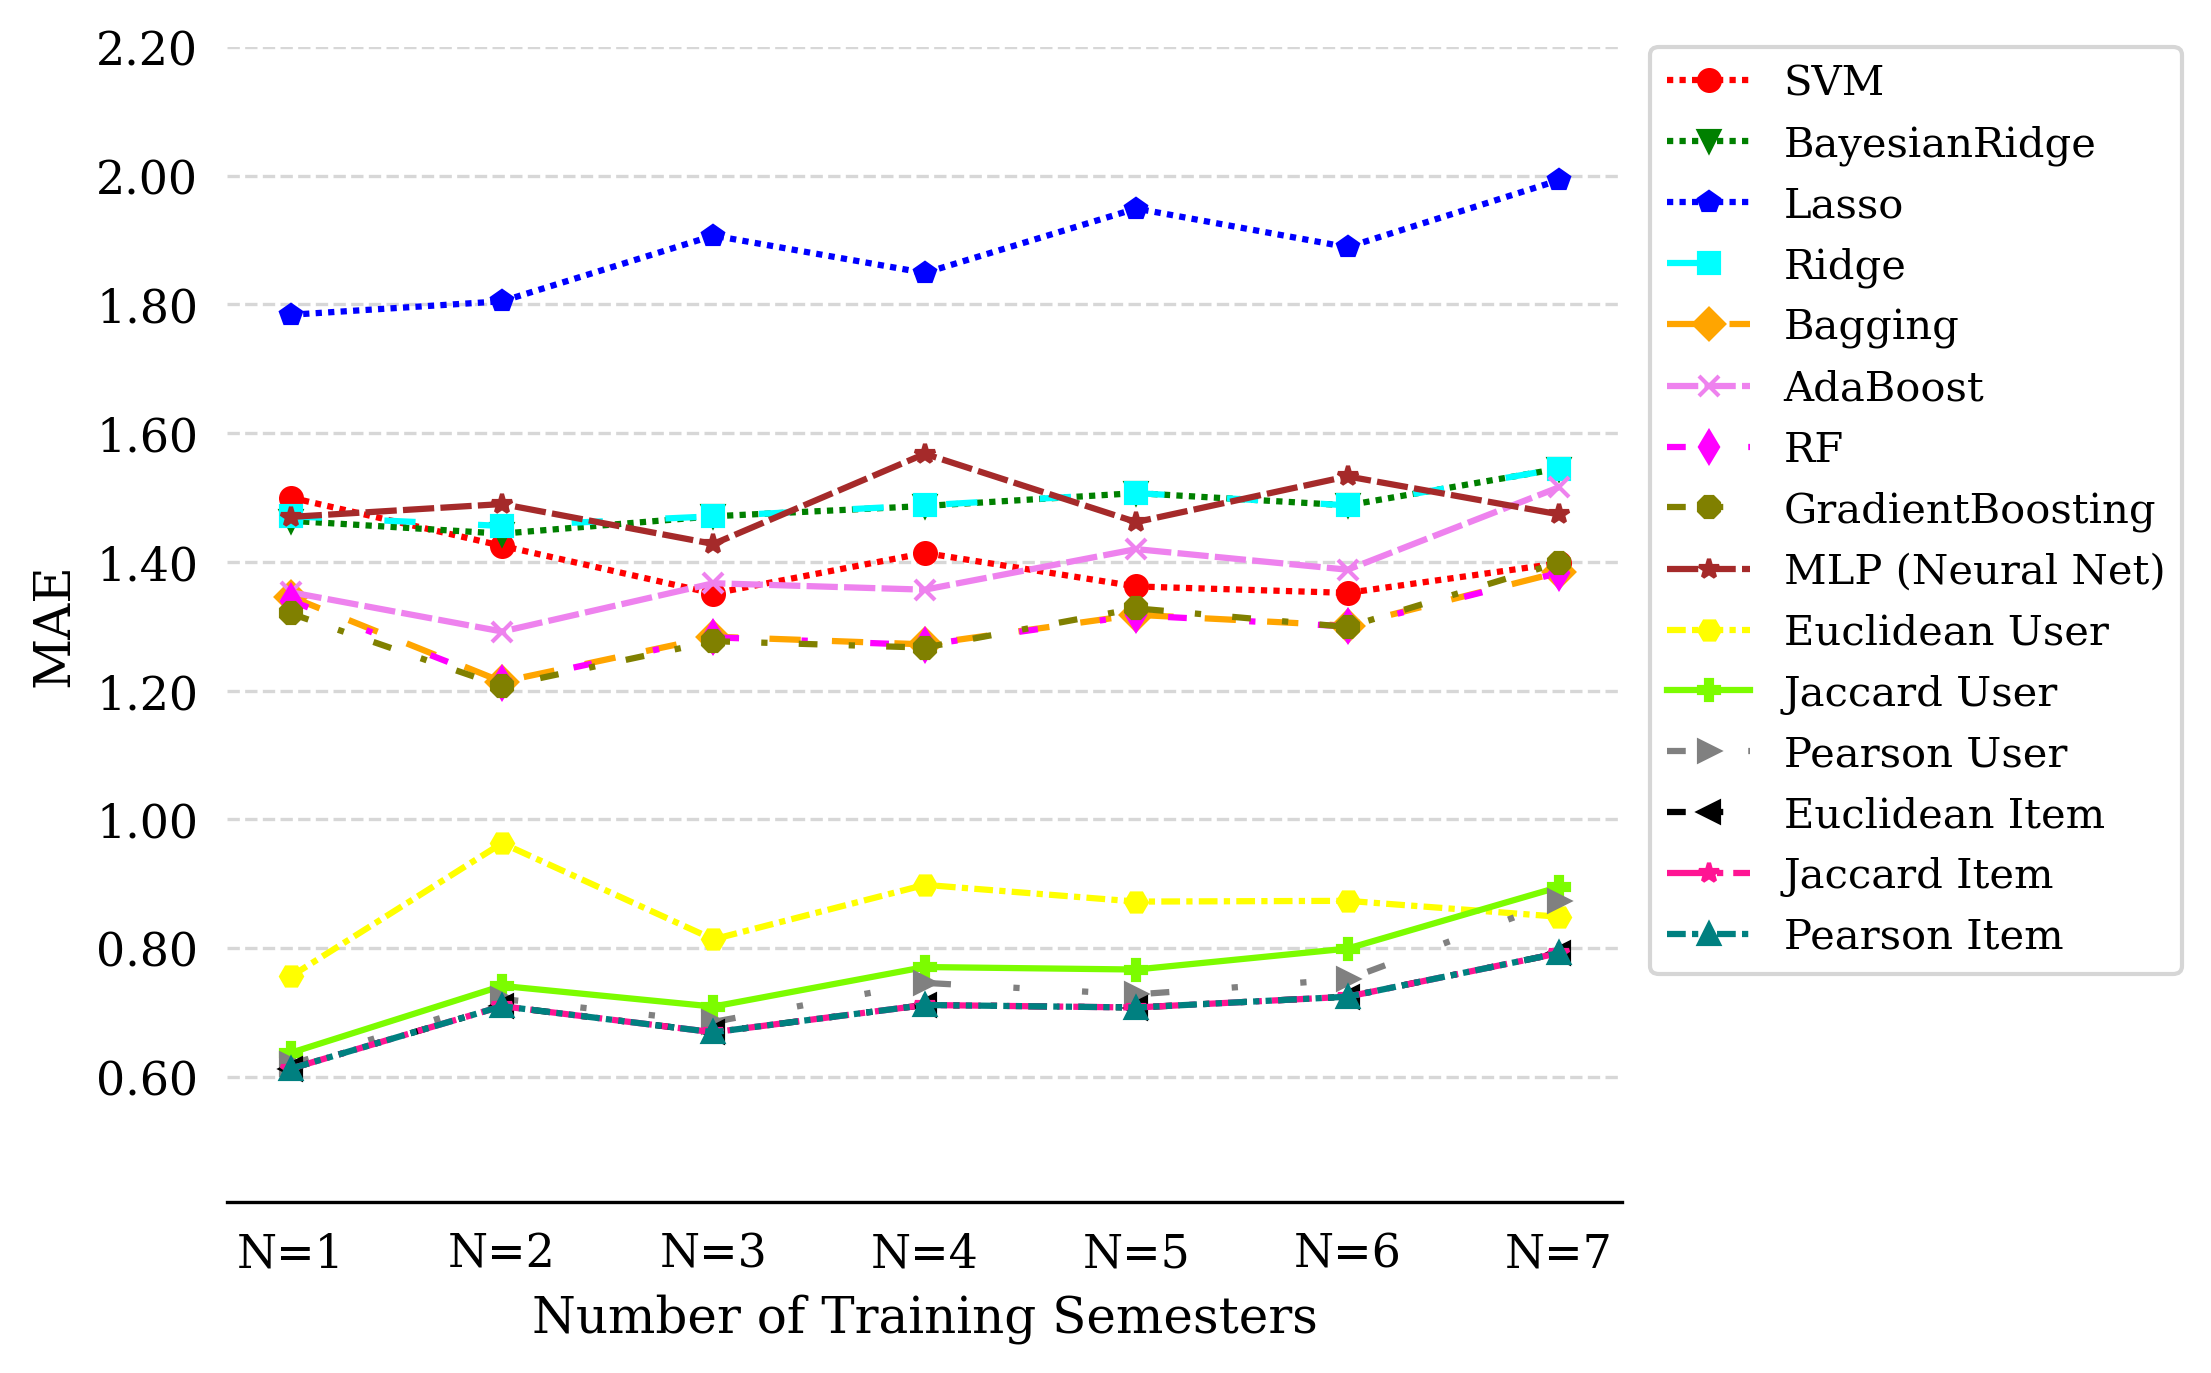

✅ Grafik kaydedildi: error_baseline_mae.eps


In [42]:
# --- KULLANIM ---
# baseline_reg, baseline_cb_user, baseline_cb_item değişkenleri hazır olmalı
plot_baseline_separate(baseline_reg, baseline_cb_user, baseline_cb_item, metric='rmse', suffix='')
plot_baseline_separate(baseline_reg, baseline_cb_user, baseline_cb_item, metric='mae', suffix='')

### Subset Üzerinde Baseline (Yeni)

In [33]:
with open('../results/results_baseline_regression_subset.json') as fr:
    baseline_reg_subset = json.load(fr)   

In [34]:
with open('../results/results_baseline_cf_user_based_subset.json') as fr:
    baseline_cb_user_subset = json.load(fr)   

In [35]:
with open('../results/results_baseline_cf_item_based_subset.json') as fr:
    baseline_cb_item_subset = json.load(fr)   

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


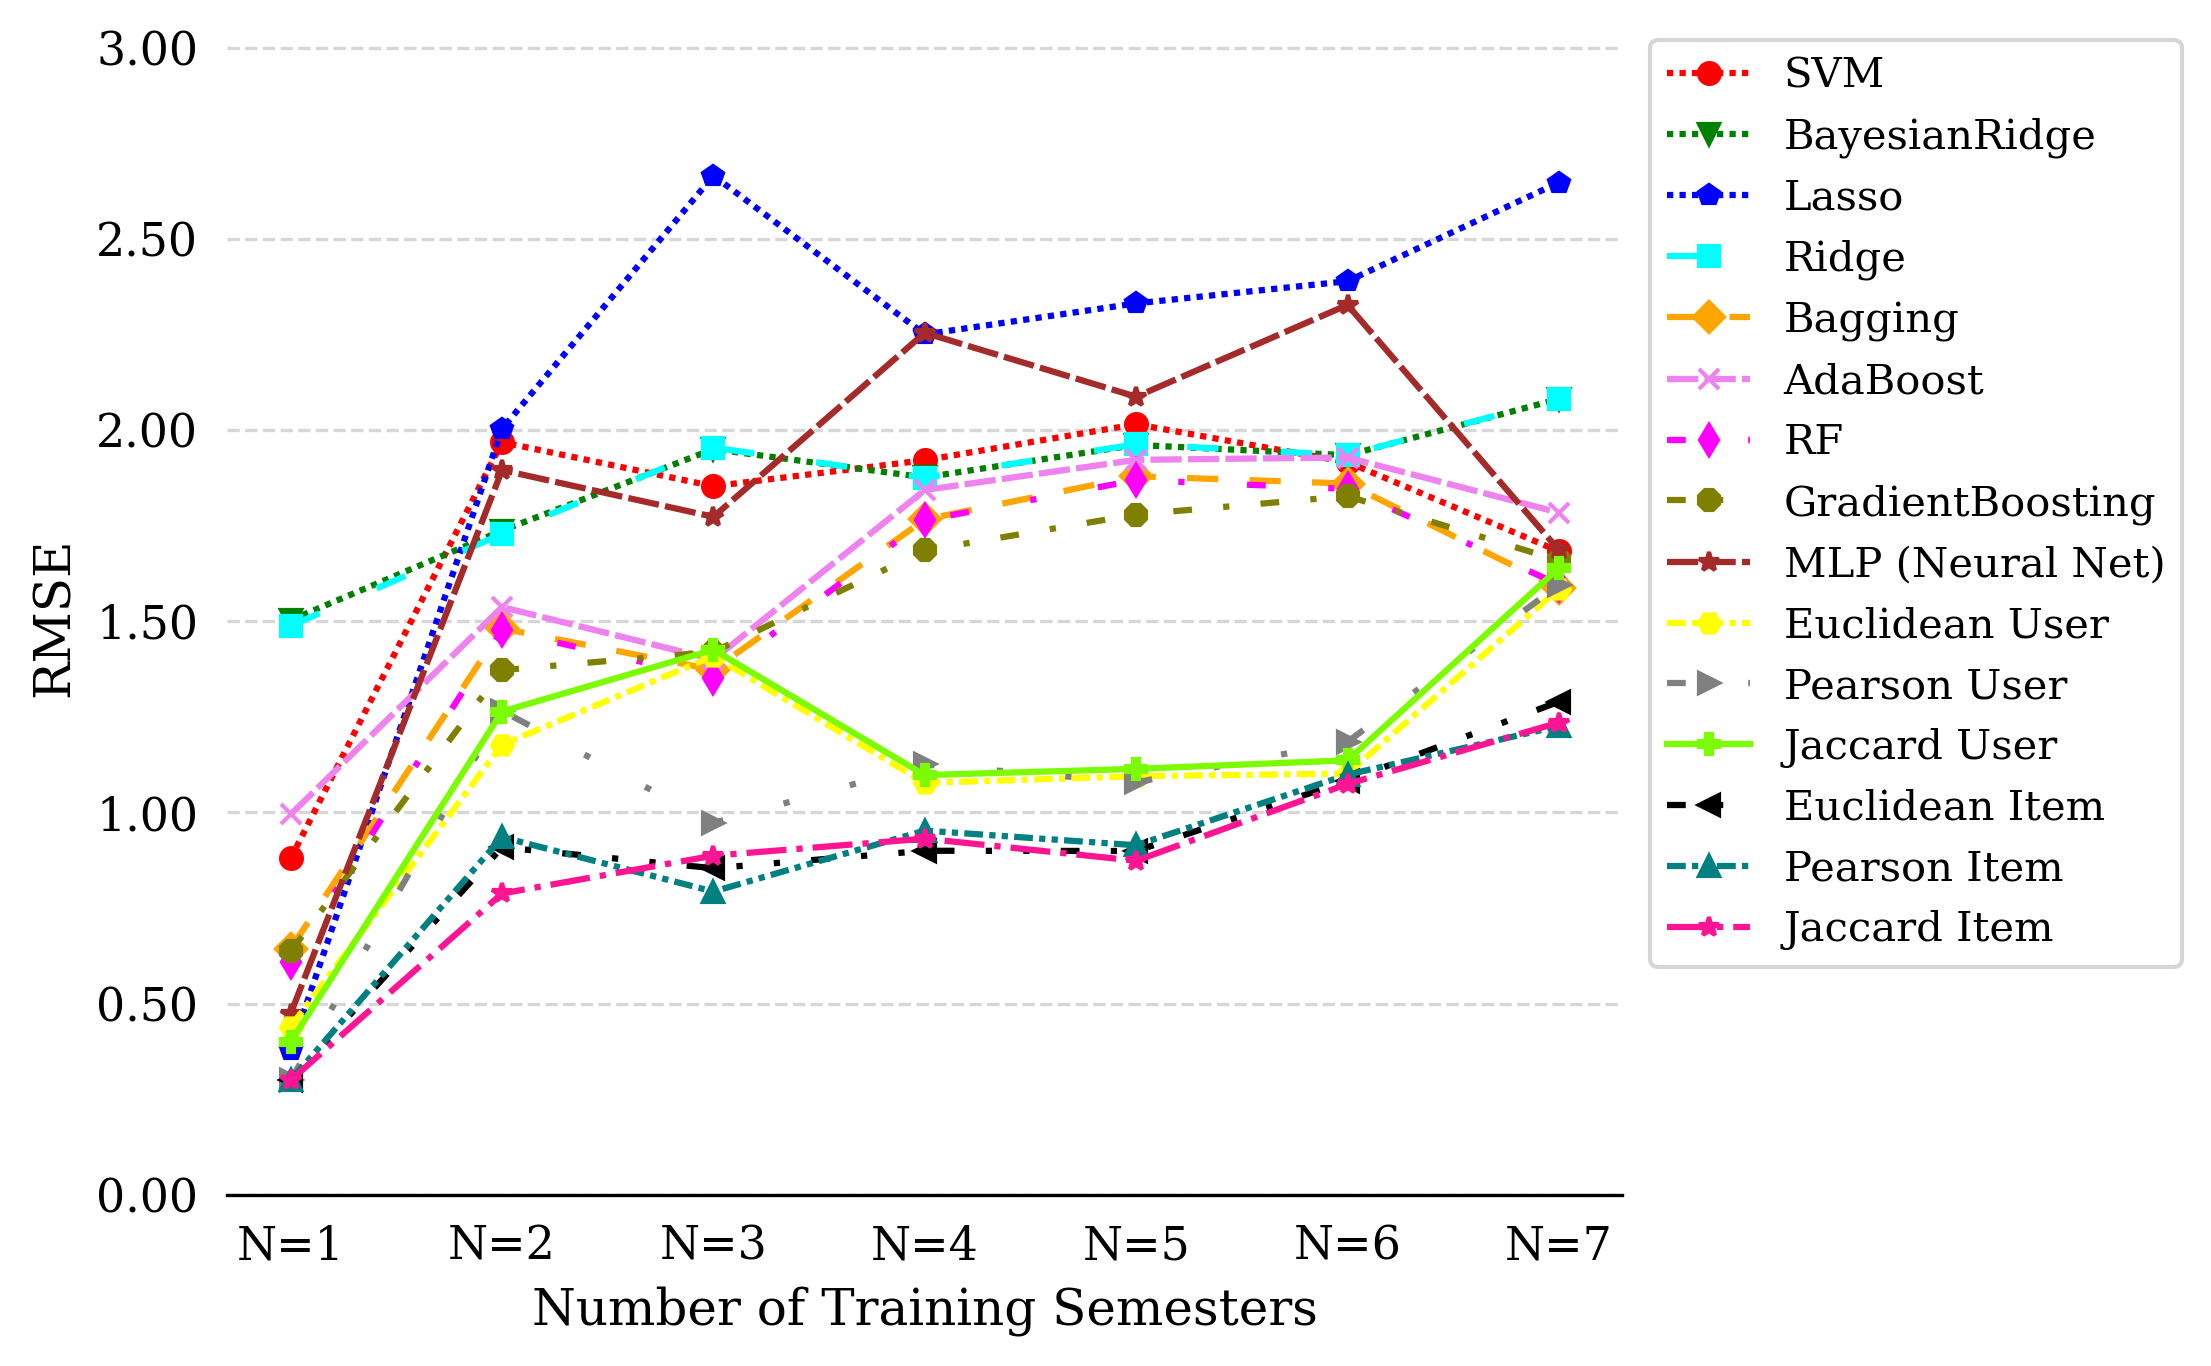

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✅ Grafik kaydedildi: error_baseline_rmse_subset.eps


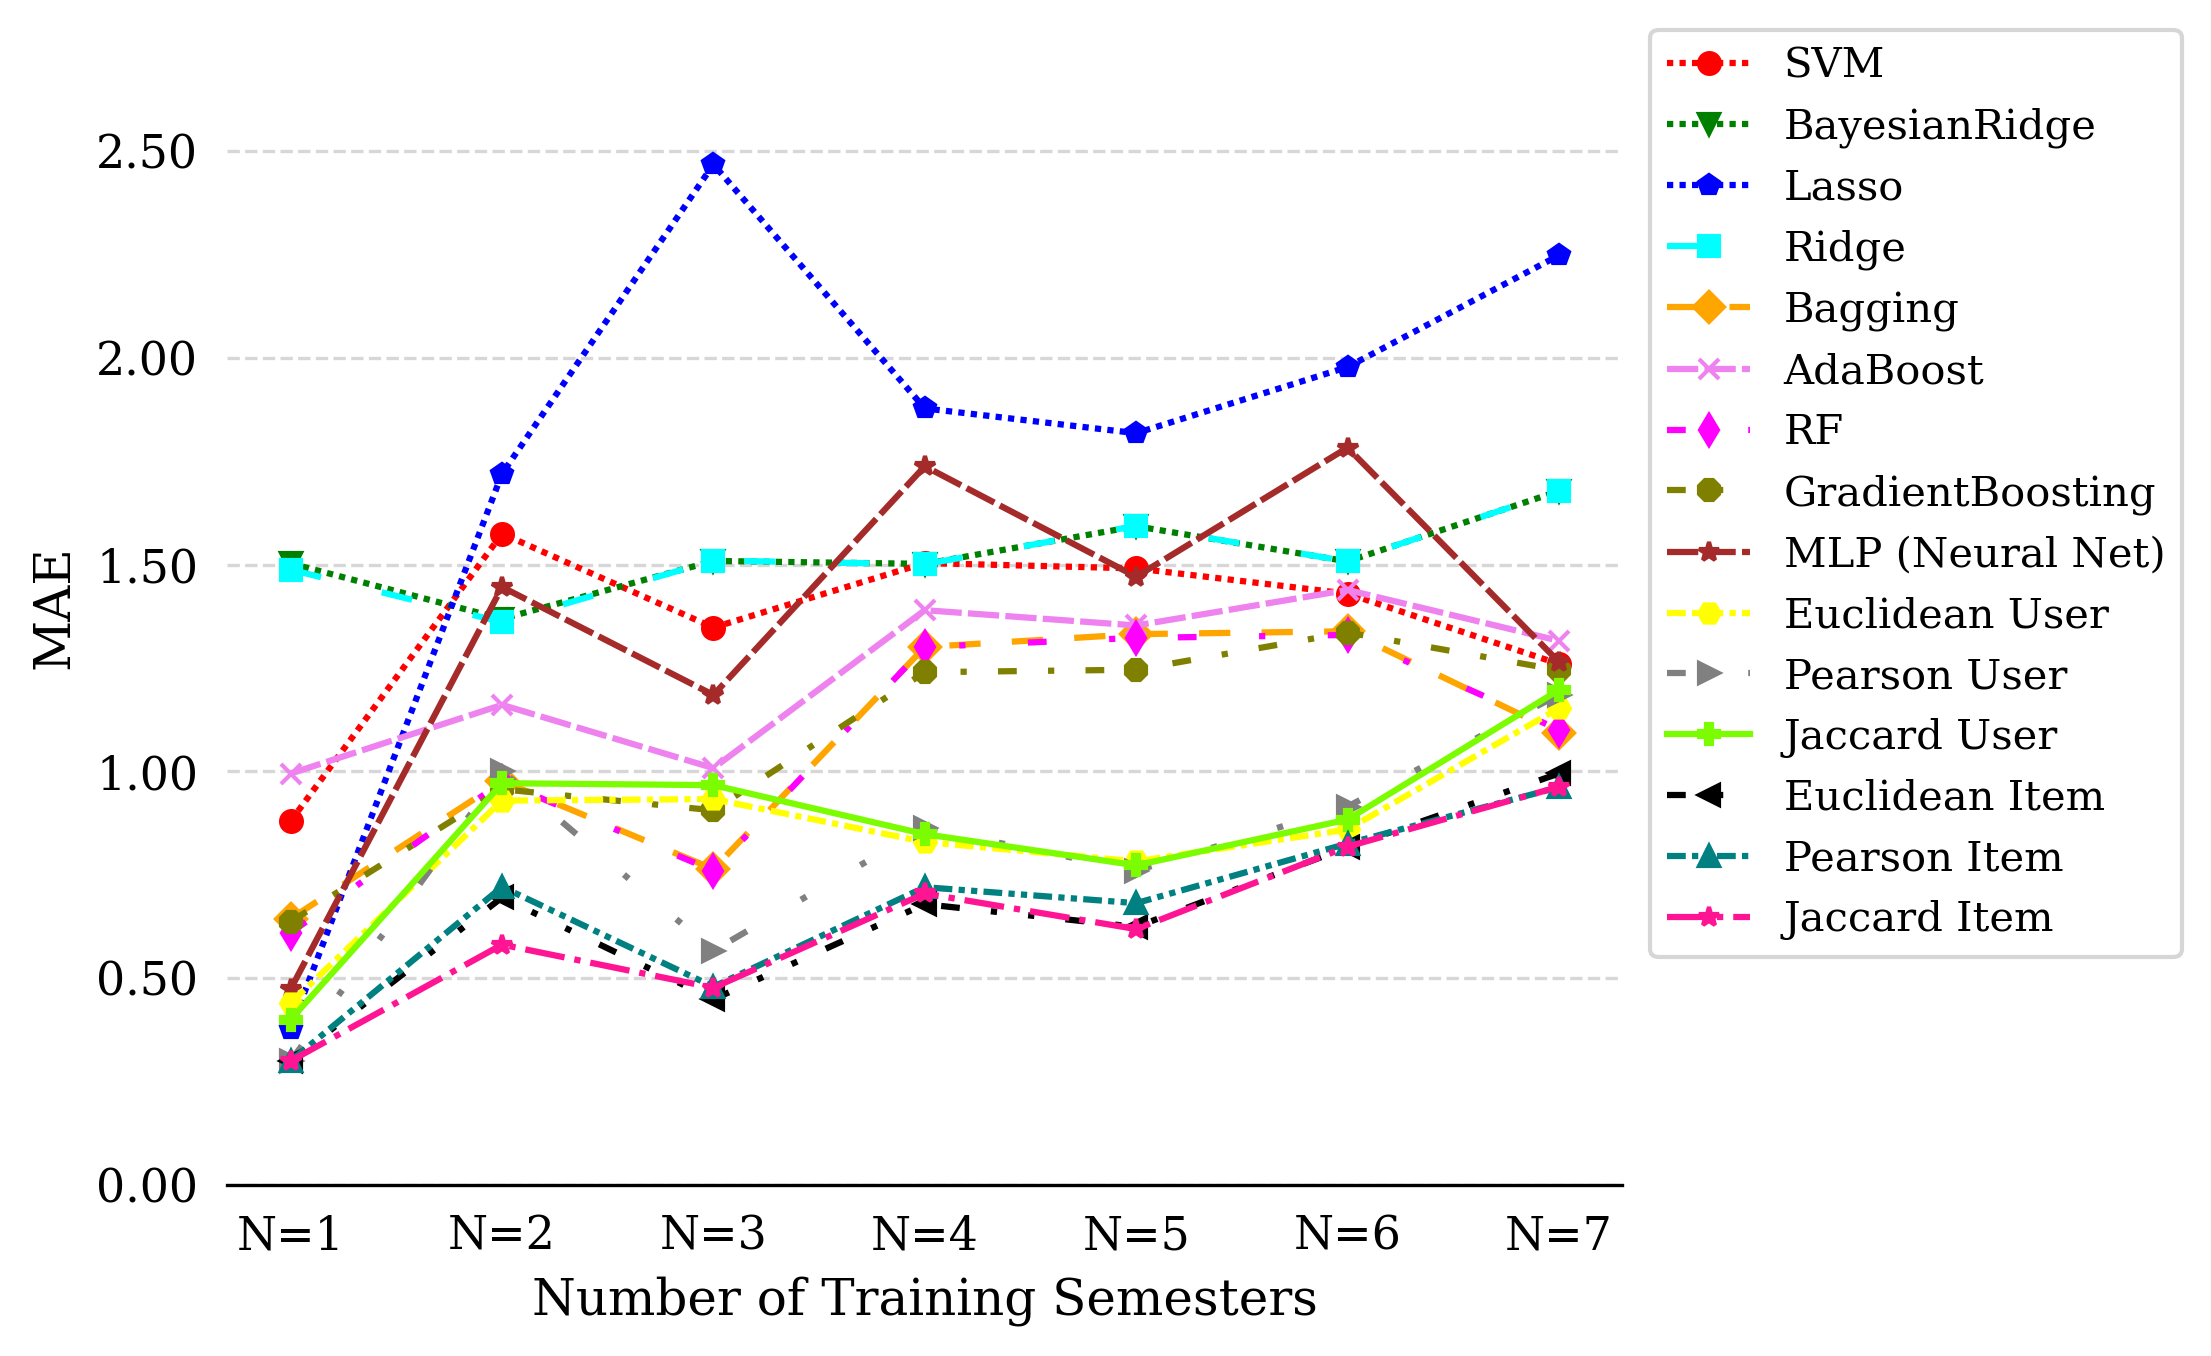

✅ Grafik kaydedildi: error_baseline_mae_subset.eps


In [ ]:
# --- KULLANIM ---
# baseline_reg, baseline_cb_user, baseline_cb_item değişkenleri hazır olmalı
plot_baseline_separate(baseline_reg_subset, baseline_cb_user_subset, baseline_cb_item_subset, metric='rmse', suffix='subset')
plot_baseline_separate(baseline_reg_subset, baseline_cb_user_subset, baseline_cb_item_subset, metric='mae', suffix='subset')

### Student-based Clustering:

In [72]:
with open('../results/clustering_student_based_regression_results (with KMeans).json') as fr:
    student_cluster_reg = json.load(fr)   

In [52]:
with open('../results/clustering_user_based_collaborative_filtering_results (Student based with KMeans).json') as fr:
    student_cluster_cb_user = json.load(fr)  

In [54]:
with open('../results/clustering_item_based_collaborative_filtering_results (Student based with KMeans).json') as fr:
    student_cluster_cb_item = json.load(fr)    

In [20]:
def plot_student_based_clustering_separate(reg, cb_user, cb_item):
    stats_data = {}

    # -------- REGRESSION (split into 2 figures) --------
    reg_parts = split_dict(reg, 4)

    fig_reg_1 = plot_cluster_group(
        reg_parts[0],
        title_suffix="Regression Models (Part I)",
        name_mapper=name_mapper,
        styles=styles,
        stats_data=stats_data,
        tag="reg"
    )

    fig_reg_2 = plot_cluster_group(
        reg_parts[1],
        title_suffix="Regression Models (Part II)",
        name_mapper=name_mapper,
        styles=styles,
        stats_data=stats_data,
        tag="reg"
    )

    fig_reg_3 = plot_cluster_group(
        reg_parts[2],
        title_suffix="Regression Models (Part III)",
        name_mapper=name_mapper,
        styles=styles,
        stats_data=stats_data,
        tag="reg"
    )

    fig_reg_4 = plot_cluster_group(
        reg_parts[3],
        title_suffix="Regression Models (Part IV)",
        name_mapper=name_mapper,
        styles=styles,
        stats_data=stats_data,
        tag="reg"
    )

    # -------- USER-BASED CF --------
    fig_user = plot_cluster_group(
        cb_user,
        title_suffix="User-Based Collaborative Filtering",
        name_mapper=name_mapper,
        styles=styles,
        stats_data=stats_data,
        tag="user"
    )

    # -------- ITEM-BASED CF --------
    fig_item = plot_cluster_group(
        cb_item,
        title_suffix="Item-Based Collaborative Filtering",
        name_mapper=name_mapper,
        styles=styles,
        stats_data=stats_data,
        tag="item"
    )

    return stats_data, fig_reg_1, fig_reg_2, fig_reg_3, fig_reg_4, fig_user, fig_item

In [56]:
def plot_student_based_clustering(reg, cb_user, cb_item):

    # =========================
    # Create separate figures
    # =========================
    fig_rmse, ax_rmse = plt.subplots(figsize=(5.5, 4.5))
    fig_mae,  ax_mae  = plt.subplots(figsize=(5.5, 4.5))

    # =========================
    # Regression
    # =========================
    print("Regression:")
    errors_reg = {}

    for model in reg:
        errors = {}
        errors_reg[model] = {}

        for num_cluster in reg[model]:
            errors_reg[model][num_cluster] = {}
            errors.setdefault(num_cluster, {'rmse': 100, 'mae': 100})

            for n_training_sem in reg[model][num_cluster]:
                y_true = reg[model][num_cluster][n_training_sem]['y_true']
                y_pred = reg[model][num_cluster][n_training_sem]['y_pred']

                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae  = mean_absolute_error(y_true, y_pred)

                errors_reg[model][num_cluster][n_training_sem] = {
                    'rmse': rmse,
                    'mae': mae
                }

            errors[num_cluster]['rmse'] = np.mean(
                [errors_reg[model][num_cluster][s]['rmse']
                 for s in errors_reg[model][num_cluster]]
            )
            errors[num_cluster]['mae'] = np.mean(
                [errors_reg[model][num_cluster][s]['mae']
                 for s in errors_reg[model][num_cluster]]
            )

        print(f"{model}: {errors}")

        rmse = {k: v['rmse'] for k, v in sorted(errors.items())}
        mae  = {k: v['mae']  for k, v in sorted(errors.items())}

        label = name_mapper.get(model, model)

        ax_rmse.plot(
            np.arange(5), list(rmse.values()),
            label=label,
            linestyle=styles[label][2],
            marker=styles[label][1],
            linewidth=1, ms=3, color=styles[label][0]
        )

        ax_mae.plot(
            np.arange(5), list(mae.values()),
            label=label,
            linestyle=styles[label][2],
            marker=styles[label][1],
            linewidth=1, ms=3, color=styles[label][0]
        )

    # =========================
    # CB User
    # =========================
    print("---------------------------------------------------")
    print("Cb User")
    errors_cb_user = {}

    for model in cb_user:
        errors = {}
        errors_cb_user[model] = {}

        for num_cluster in cb_user[model]:
            errors_cb_user[model][num_cluster] = {}
            errors.setdefault(num_cluster, {'rmse': 100, 'mae': 100})

            for n_training_sem in cb_user[model][num_cluster]:
                y_true = cb_user[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_user[model][num_cluster][n_training_sem]['y_pred']

                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae  = mean_absolute_error(y_true, y_pred)

                errors_cb_user[model][num_cluster][n_training_sem] = {
                    'rmse': rmse,
                    'mae': mae
                }

            errors[num_cluster]['rmse'] = np.mean(
                [errors_cb_user[model][num_cluster][s]['rmse']
                 for s in errors_cb_user[model][num_cluster]]
            )
            errors[num_cluster]['mae'] = np.mean(
                [errors_cb_user[model][num_cluster][s]['mae']
                 for s in errors_cb_user[model][num_cluster]]
            )

        print(f"{model}: {errors}")

        rmse = {k: v['rmse'] for k, v in sorted(errors.items())}
        mae  = {k: v['mae']  for k, v in sorted(errors.items())}

        model_label  = model + ' (user-based)'
        model_legend = name_mapper.get(model, model) + 'User'

        ax_rmse.plot(
            np.arange(5), list(rmse.values()),
            label=model_legend,
            linestyle=styles[model_label][2],
            marker=styles[model_label][1],
            linewidth=1, ms=3, color=styles[model_label][0]
        )

        ax_mae.plot(
            np.arange(5), list(mae.values()),
            label=model_legend,
            linestyle=styles[model_label][2],
            marker=styles[model_label][1],
            linewidth=1, ms=3, color=styles[model_label][0]
        )

    # =========================
    # CB Item
    # =========================
    print("---------------------------------------------------")
    print("Cb Item")
    errors_cb_item = {}

    for model in cb_item:
        errors = {}
        errors_cb_item[model] = {}

        for num_cluster in cb_item[model]:
            errors_cb_item[model][num_cluster] = {}
            errors.setdefault(num_cluster, {'rmse': 100, 'mae': 100})

            for n_training_sem in cb_item[model][num_cluster]:
                y_true = cb_item[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_item[model][num_cluster][n_training_sem]['y_pred']

                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae  = mean_absolute_error(y_true, y_pred)

                errors_cb_item[model][num_cluster][n_training_sem] = {
                    'rmse': rmse,
                    'mae': mae
                }

            errors[num_cluster]['rmse'] = np.mean(
                [errors_cb_item[model][num_cluster][s]['rmse']
                 for s in errors_cb_item[model][num_cluster]]
            )
            errors[num_cluster]['mae'] = np.mean(
                [errors_cb_item[model][num_cluster][s]['mae']
                 for s in errors_cb_item[model][num_cluster]]
            )

        print(f"{model}: {errors}")

        rmse = {k: v['rmse'] for k, v in sorted(errors.items())}
        mae  = {k: v['mae']  for k, v in sorted(errors.items())}

        model_label  = model + ' (item-based)'
        model_legend = name_mapper.get(model, model) + 'Item'

        ax_rmse.plot(
            np.arange(5), list(rmse.values()),
            label=model_legend,
            linestyle=styles[model_label][2],
            marker=styles[model_label][1],
            linewidth=1, ms=3, color=styles[model_label][0]
        )

        ax_mae.plot(
            np.arange(5), list(mae.values()),
            label=model_legend,
            linestyle=styles[model_label][2],
            marker=styles[model_label][1],
            linewidth=1, ms=3, color=styles[model_label][0]
        )

    # =========================
    # Formatting (shared)
    # =========================
    for ax in [ax_rmse, ax_mae]:
        ax.set_xticks(np.arange(5))
        ax.set_xticklabels([f'k={i}' for i in range(10, 31, 5)],
                           fontsize=11, fontfamily='serif')
        ax.grid(axis='y')
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.tick_params(axis="both", which="both",
                       bottom=False, top=False,
                       left=False, right=False)

    ax_rmse.set_ylabel('RMSE', fontfamily='serif', fontsize=11)
    ax_mae.set_ylabel('MAE',  fontfamily='serif', fontsize=11)

    ax_rmse.legend(prop={'size': 10, 'family': 'serif'},
                   loc='right', bbox_to_anchor=(1.44, 0.5))
    ax_mae.legend(prop={'size': 10, 'family': 'serif'},
                   loc='right', bbox_to_anchor=(1.44, 0.5))

    # =========================
    # Save figures
    # =========================
    fig_rmse.savefig('error_cluster_student_rmse.eps',
                     bbox_inches='tight', dpi=1200)
    fig_mae.savefig('error_cluster_student_mae.eps',
                    bbox_inches='tight', dpi=1200)

Regression:
SVR: {'10': {'rmse': 2.8375736711962993, 'mae': 2.327790702849712}, '30': {'rmse': 3.7569190553215734, 'mae': 3.0212927496793576}, '25': {'rmse': 3.6393306453307437, 'mae': 2.9186906327923694}, '20': {'rmse': 4.252831063244009, 'mae': 3.4228483397010914}, '15': {'rmse': 2.881621439783794, 'mae': 2.3617488552941404}}
Ridge: {'15': {'rmse': 2.2024109833663883, 'mae': 1.7140852428833835}, '30': {'rmse': 3.212694736895049, 'mae': 2.6573489053001396}, '25': {'rmse': 2.291219922998287, 'mae': 1.8342330643204245}, '20': {'rmse': 2.8526556018521108, 'mae': 2.285416569685166}, '10': {'rmse': 2.0114890807076002, 'mae': 1.5951209400639457}}
RandomForestRegressor: {'10': {'rmse': 1.9898639884775375, 'mae': 1.4904417854863568}, '20': {'rmse': 3.2987198289539763, 'mae': 2.6444711374821273}, '30': {'rmse': 3.009558335888575, 'mae': 2.3347138974070254}, '15': {'rmse': 2.195033757639163, 'mae': 1.6963616855765313}, '25': {'rmse': 2.2444926165961427, 'mae': 1.7422722226929663}}
Lasso: {'10':

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


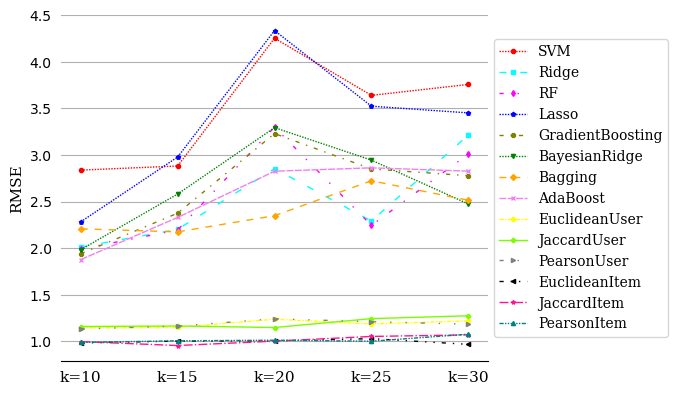

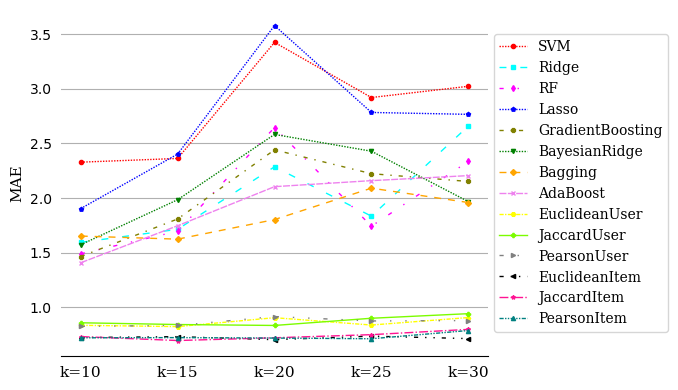

In [58]:
plot_student_based_clustering(student_cluster_reg, student_cluster_cb_user, student_cluster_cb_item)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


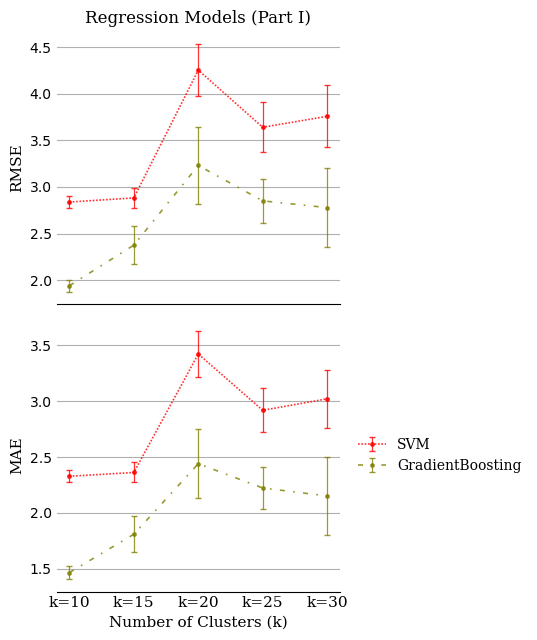

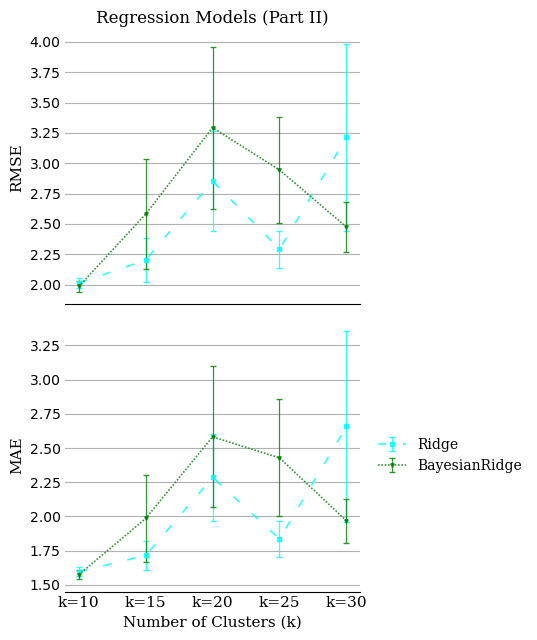

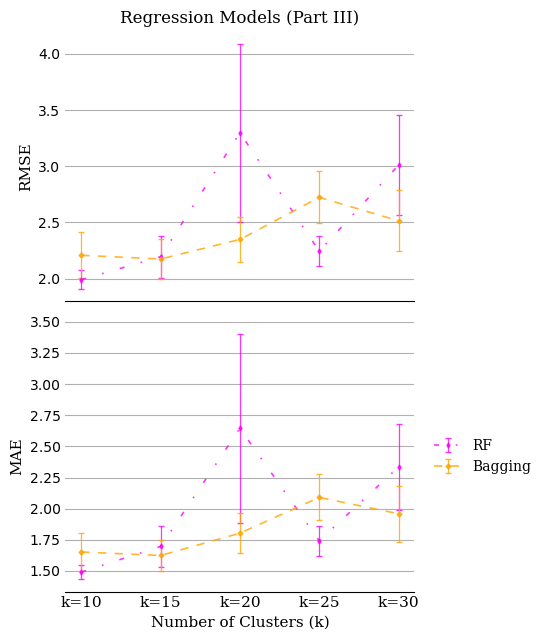

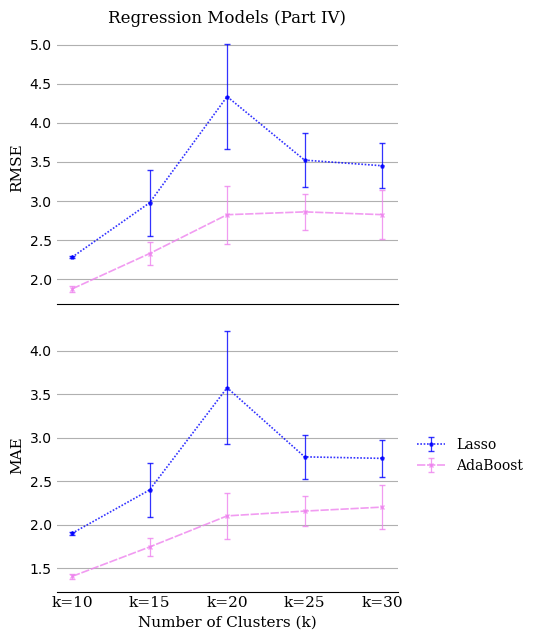

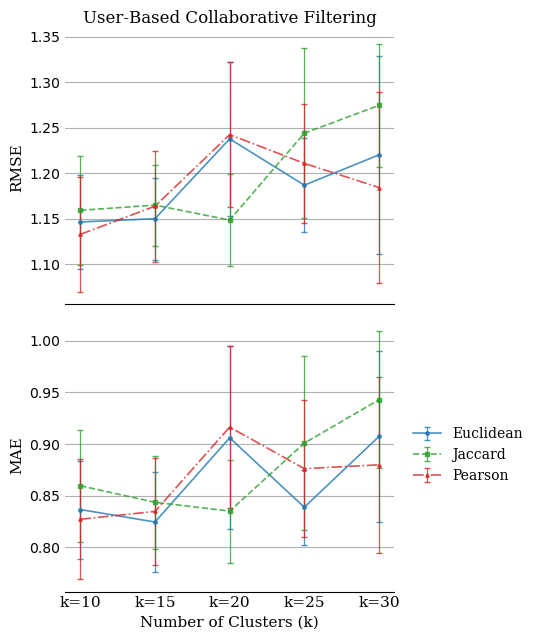

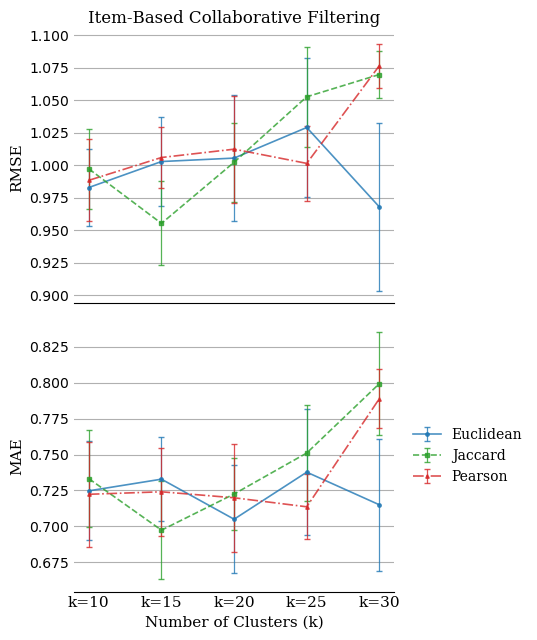

In [54]:
stats_data, fig_reg_1, fig_reg_2, fig_reg_3, fig_reg_4, fig_user, fig_item = \
    plot_student_based_clustering_separate(
        student_cluster_reg,
        student_cluster_cb_user,
        student_cluster_cb_item
    )

fig_reg_1.savefig("student_based_regression_clusters_part1.eps", dpi=1200, bbox_inches="tight")
fig_reg_2.savefig("student_based_regression_clusters_part2.eps", dpi=1200, bbox_inches="tight")
fig_reg_3.savefig("student_based_regression_clusters_part3.eps", dpi=1200, bbox_inches="tight")
fig_reg_4.savefig("student_based_regression_clusters_part4.eps", dpi=1200, bbox_inches="tight")
fig_user.savefig("student_based_user_cf_clusters.eps", dpi=1200, bbox_inches="tight")
fig_item.savefig("student_based_item_cf_clusters.eps", dpi=1200, bbox_inches="tight")

In [74]:
import pandas as pd
from scipy import stats
import numpy as np

# İsimleri güzelleştirmek için
name_mapper = {
    'SVR': 'SVM', 
    'RandomForestRegressor': 'RF', 
    'AdaBoostRegressor': 'AdaBoost', 
    'GradientBoostingRegressor': 'GradientBoosting', 
    'BaggingRegressor': 'Bagging',
    'Euclidean Distance': 'Euclidean',
    'Pearson Correlation': 'Pearson',
    'Jaccard Index': 'Jaccard',
    'Ridge': 'Ridge',
    'Lasso': 'Lasso',
    'BayesianRidge': 'BayesianRidge'
}

def compare_champion_vs_all_item_rmse(stats_data, champion_model_raw, baseline_models_list, k_values):
    results = []
    
    # Bizim modelin güzel adı
    champ_pretty = name_mapper.get(champion_model_raw.replace('_item',''), champion_model_raw) + " (Item)"
    
    print(f"--- {champ_pretty} vs All Regression RMSE ---")
    
    for baseline in baseline_models_list:
        base_pretty = name_mapper.get(baseline, baseline)
        
        for k in k_values:
            # Anahtarları oluştur
            key_champ = f"{champion_model_raw}_k{k}"
            key_base = f"{baseline}_reg_k{k}"
            
            # Veri var mı kontrolü
            if key_champ not in stats_data or key_base not in stats_data:
                continue
                
            # Verileri çek
            scores_champ = stats_data[key_champ]['rmse']
            scores_base = stats_data[key_base]['rmse']
            
            mean_champ = np.mean(scores_champ)
            mean_base = np.mean(scores_base)
            
            # Wilcoxon Testi
            try:
                stat, p_value = stats.wilcoxon(scores_champ, scores_base)
            except ValueError:
                p_value = 1.0 # Veriler birebir aynıysa
            
            # İyileşme Oranı
            improvement = ((mean_base - mean_champ) / mean_base) * 100
            
            # Tabloya ekle
            results.append({
                'Opponent': base_pretty,
                'k': k,
                'Our RMSE': mean_champ,
                'Opponent RMSE': mean_base,
                'Improvement (%)': improvement,
                'P-Value': p_value,
                'Significant?': 'YES' if p_value < 0.05 else 'NO'
            })
            
    return pd.DataFrame(results)

In [72]:
import pandas as pd
from scipy import stats
import numpy as np

# İsimleri güzelleştirmek için
name_mapper = {
    'SVR': 'SVM', 
    'RandomForestRegressor': 'RF', 
    'AdaBoostRegressor': 'AdaBoost', 
    'GradientBoostingRegressor': 'GradientBoosting', 
    'BaggingRegressor': 'Bagging',
    'Euclidean Distance': 'Euclidean',
    'Pearson Correlation': 'Pearson',
    'Jaccard Index': 'Jaccard',
    'Ridge': 'Ridge',
    'Lasso': 'Lasso',
    'BayesianRidge': 'BayesianRidge'
}

def compare_champion_vs_all_item_mae(stats_data, champion_model_raw, baseline_models_list, k_values):
    results = []
    
    # Bizim modelin güzel adı
    champ_pretty = name_mapper.get(champion_model_raw.replace('_item',''), champion_model_raw) + " (Item)"
    
    print(f"--- {champ_pretty} vs All Regression MAE ---")
    
    for baseline in baseline_models_list:
        base_pretty = name_mapper.get(baseline, baseline)
        
        for k in k_values:
            # Anahtarları oluştur
            key_champ = f"{champion_model_raw}_k{k}"
            key_base = f"{baseline}_reg_k{k}"
            
            # Veri var mı kontrolü
            if key_champ not in stats_data or key_base not in stats_data:
                continue
                
            # Verileri çek
            scores_champ = stats_data[key_champ]['mae']
            scores_base = stats_data[key_base]['mae']
            
            mean_champ = np.mean(scores_champ)
            mean_base = np.mean(scores_base)
            
            # Wilcoxon Testi
            try:
                stat, p_value = stats.wilcoxon(scores_champ, scores_base)
            except ValueError:
                p_value = 1.0 # Veriler birebir aynıysa
            
            # İyileşme Oranı
            improvement = ((mean_base - mean_champ) / mean_base) * 100
            
            # Tabloya ekle
            results.append({
                'Opponent': base_pretty,
                'k': k,
                'Our MAE': mean_champ,
                'Opponent MAE': mean_base,
                'Improvement (%)': improvement,
                'P-Value': p_value,
                'Significant?': 'YES' if p_value < 0.05 else 'NO'
            })
            
    return pd.DataFrame(results)

In [70]:
import pandas as pd
from scipy import stats
import numpy as np

# İsimleri güzelleştirmek için
name_mapper = {
    'SVR': 'SVM', 
    'RandomForestRegressor': 'RF', 
    'AdaBoostRegressor': 'AdaBoost', 
    'GradientBoostingRegressor': 'GradientBoosting', 
    'BaggingRegressor': 'Bagging',
    'Euclidean Distance': 'Euclidean',
    'Pearson Correlation': 'Pearson',
    'Jaccard Index': 'Jaccard',
    'Ridge': 'Ridge',
    'Lasso': 'Lasso',
    'BayesianRidge': 'BayesianRidge'
}

def compare_champion_vs_all_user_rmse(stats_data, champion_model_raw, baseline_models_list, k_values):
    results = []
    
    # Bizim modelin güzel adı
    champ_pretty = name_mapper.get(champion_model_raw.replace('_user',''), champion_model_raw) + " (User)"
    
    print(f"--- {champ_pretty} vs All Regression RMSE ---")
    
    for baseline in baseline_models_list:
        base_pretty = name_mapper.get(baseline, baseline)
        
        for k in k_values:
            # Anahtarları oluştur
            key_champ = f"{champion_model_raw}_k{k}"
            key_base = f"{baseline}_reg_k{k}"
            
            # Veri var mı kontrolü
            if key_champ not in stats_data or key_base not in stats_data:
                continue
                
            # Verileri çek
            scores_champ = stats_data[key_champ]['rmse']
            scores_base = stats_data[key_base]['rmse']
            
            mean_champ = np.mean(scores_champ)
            mean_base = np.mean(scores_base)
            
            # Wilcoxon Testi
            try:
                stat, p_value = stats.wilcoxon(scores_champ, scores_base)
            except ValueError:
                p_value = 1.0 # Veriler birebir aynıysa
            
            # İyileşme Oranı
            improvement = ((mean_base - mean_champ) / mean_base) * 100
            
            # Tabloya ekle
            results.append({
                'Opponent': base_pretty,
                'k': k,
                'Our RMSE': mean_champ,
                'Opponent RMSE': mean_base,
                'Improvement (%)': improvement,
                'P-Value': p_value,
                'Significant?': 'YES' if p_value < 0.05 else 'NO'
            })
            
    return pd.DataFrame(results)

In [68]:
import pandas as pd
from scipy import stats
import numpy as np

# İsimleri güzelleştirmek için
name_mapper = {
    'SVR': 'SVM', 
    'RandomForestRegressor': 'RF', 
    'AdaBoostRegressor': 'AdaBoost', 
    'GradientBoostingRegressor': 'GradientBoosting', 
    'BaggingRegressor': 'Bagging',
    'Euclidean Distance': 'Euclidean',
    'Pearson Correlation': 'Pearson',
    'Jaccard Index': 'Jaccard',
    'Ridge': 'Ridge',
    'Lasso': 'Lasso',
    'BayesianRidge': 'BayesianRidge'
}

def compare_champion_vs_all_user_mae(stats_data, champion_model_raw, baseline_models_list, k_values):
    results = []
    
    # Bizim modelin güzel adı
    champ_pretty = name_mapper.get(champion_model_raw.replace('_user',''), champion_model_raw) + " (User)"
    
    print(f"--- {champ_pretty} vs All Regression MAE ---")
    
    for baseline in baseline_models_list:
        base_pretty = name_mapper.get(baseline, baseline)
        
        for k in k_values:
            # Anahtarları oluştur
            key_champ = f"{champion_model_raw}_k{k}"
            key_base = f"{baseline}_reg_k{k}"
            
            # Veri var mı kontrolü
            if key_champ not in stats_data or key_base not in stats_data:
                continue
                
            # Verileri çek
            scores_champ = stats_data[key_champ]['mae']
            scores_base = stats_data[key_base]['mae']
            
            mean_champ = np.mean(scores_champ)
            mean_base = np.mean(scores_base)
            
            # Wilcoxon Testi
            try:
                stat, p_value = stats.wilcoxon(scores_champ, scores_base)
            except ValueError:
                p_value = 1.0 # Veriler birebir aynıysa
            
            # İyileşme Oranı
            improvement = ((mean_base - mean_champ) / mean_base) * 100
            
            # Tabloya ekle
            results.append({
                'Opponent': base_pretty,
                'k': k,
                'Our MAE': mean_champ,
                'Opponent MAE': mean_base,
                'Improvement (%)': improvement,
                'P-Value': p_value,
                'Significant?': 'YES' if p_value < 0.05 else 'NO'
            })
            
    return pd.DataFrame(results)

#### Student-based RMSE Wilcoxon Test

In [76]:
# --- AYARLAR ---
CHAMPION = 'Euclidean Distance_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Euclidean (User) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        59.597483  0.015625          YES
1                SVM  15        60.090338  0.015625          YES
2                SVM  20        70.897124  0.015625          YES
3                SVM  25        67.387973  0.015625          YES
4                SVM  30        67.524206  0.015625          YES
5                 RF  10        42.385450  0.015625          YES
6                 RF  15        47.606939  0.015625          YES
7                 RF  20        62.479501  0.015625          YES
8                 RF  25        47.121257  0.015625          YES
9                 RF  30        59.459523  0.015625          YES
10          AdaBoost  10        38.935207  0.015625          YES
11          AdaBoost  15        50.639309  0.015625          YES
12          AdaBoost  20        56.200811  0.015625          YES
13          AdaBoost  25        58.530083 

In [98]:
# --- AYARLAR ---
CHAMPION = 'Euclidean Distance_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Euclidean Distance_item (User) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        65.361128  0.015625          YES
1                SVM  15        65.196920  0.015625          YES
2                SVM  20        76.356170  0.015625          YES
3                SVM  25        71.722962  0.015625          YES
4                SVM  30        74.235779  0.015625          YES
5                 RF  10        50.604488  0.015625          YES
6                 RF  15        54.310816  0.015625          YES
7                 RF  20        69.517504  0.015625          YES
8                 RF  25        54.150220  0.015625          YES
9                 RF  30        67.837775  0.015625          YES
10          AdaBoost  10        47.646442  0.015625          YES
11          AdaBoost  15        56.955183  0.015625          YES
12          AdaBoost  20        64.416555  0.015625          YES
13          AdaBoost  25    

In [78]:
# --- AYARLAR ---
CHAMPION = 'Pearson Correlation_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Pearson (User) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        60.077325  0.015625          YES
1                SVM  15        59.613355  0.015625          YES
2                SVM  20        70.788694  0.015625          YES
3                SVM  25        66.730403  0.015625          YES
4                SVM  30        68.477240  0.015625          YES
5                 RF  10        43.069711  0.015625          YES
6                 RF  15        46.980759  0.015625          YES
7                 RF  20        62.339709  0.015625          YES
8                 RF  25        46.055041  0.015625          YES
9                 RF  30        60.649223  0.015625          YES
10          AdaBoost  10        39.660446  0.015625          YES
11          AdaBoost  15        50.049371  0.015625          YES
12          AdaBoost  20        56.037626  0.015625          YES
13          AdaBoost  25        57.693908  0

In [80]:
# --- AYARLAR ---
CHAMPION = 'Pearson Correlation_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_item_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Pearson (Item) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        65.166245  0.015625          YES
1                SVM  15        65.089161  0.015625          YES
2                SVM  20        76.194493  0.015625          YES
3                SVM  25        72.482003  0.015625          YES
4                SVM  30        71.340942  0.015625          YES
5                 RF  10        50.326582  0.015625          YES
6                 RF  15        54.169351  0.015625          YES
7                 RF  20        69.309064  0.015625          YES
8                 RF  25        55.380968  0.015625          YES
9                 RF  30        64.224066  0.015625          YES
10          AdaBoost  10        47.351893  0.015625          YES
11          AdaBoost  15        56.821906  0.015625          YES
12          AdaBoost  20        64.173234  0.015625          YES
13          AdaBoost  25        65.007724  0

In [82]:
# --- AYARLAR ---
CHAMPION = 'Jaccard Index_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Jaccard (User) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        59.146329  0.015625          YES
1                SVM  15        59.573695  0.015625          YES
2                SVM  20        72.993857  0.015625          YES
3                SVM  25        65.819186  0.015625          YES
4                SVM  30        66.077707  0.015625          YES
5                 RF  10        41.742098  0.015625          YES
6                 RF  15        46.928695  0.015625          YES
7                 RF  20        65.182686  0.015625          YES
8                 RF  25        44.577548  0.015625          YES
9                 RF  30        57.653817  0.015625          YES
10          AdaBoost  10        38.253329  0.015625          YES
11          AdaBoost  15        50.000320  0.015625          YES
12          AdaBoost  20        59.356347  0.015625          YES
13          AdaBoost  25        56.535191  0

In [84]:
# --- AYARLAR ---
CHAMPION = 'Jaccard Index_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_item_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Jaccard (Item) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        64.855486  0.015625          YES
1                SVM  15        66.849431  0.015625          YES
2                SVM  20        76.431593  0.015625          YES
3                SVM  25        71.073594  0.015625          YES
4                SVM  30        71.522537  0.015625          YES
5                 RF  10        49.883435  0.015625          YES
6                 RF  15        56.480218  0.015625          YES
7                 RF  20        69.614742  0.015625          YES
8                 RF  25        53.097303  0.015625          YES
9                 RF  30        64.450756  0.015625          YES
10          AdaBoost  10        46.882208  0.015625          YES
11          AdaBoost  15        58.999026  0.015625          YES
12          AdaBoost  20        64.530065  0.015625          YES
13          AdaBoost  25        63.216771  0

#### Student-based MAE Wilcoxon Test

In [86]:
# --- AYARLAR ---
CHAMPION = 'Euclidean Distance_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Euclidean (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        64.056511  0.015625          YES
1                SVM  15        65.084122  0.015625          YES
2                SVM  20        73.527776  0.015625          YES
3                SVM  25        71.255149  0.015625          YES
4                SVM  30        69.965412  0.015625          YES
5                 RF  10        43.863008  0.015625          YES
6                 RF  15        51.388589  0.015625          YES
7                 RF  20        65.735906  0.015625          YES
8                 RF  25        51.846028  0.015625          YES
9                 RF  30        61.133017  0.015625          YES
10          AdaBoost  10        40.595662  0.015625          YES
11          AdaBoost  15        52.791341  0.015625          YES
12          AdaBoost  20        56.932507  0.015625          YES
13          AdaBoost  25        61.140622  

In [88]:
# --- AYARLAR ---
CHAMPION = 'Euclidean Distance_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Euclidean Distance_item (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        68.865161  0.015625          YES
1                SVM  15        68.969409  0.015625          YES
2                SVM  20        79.402352  0.015625          YES
3                SVM  25        74.723997  0.015625          YES
4                SVM  30        76.332851  0.015625          YES
5                 RF  10        51.373217  0.015625          YES
6                 RF  15        56.797855  0.015625          YES
7                 RF  20        73.339613  0.015625          YES
8                 RF  25        57.657114  0.015625          YES
9                 RF  30        69.372956  0.015625          YES
10          AdaBoost  10        48.542989  0.015625          YES
11          AdaBoost  15        58.044515  0.015625          YES
12          AdaBoost  20        66.489818  0.015625          YES
13          AdaBoost  25     

In [90]:
# --- AYARLAR ---
CHAMPION = 'Pearson Correlation_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Pearson (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        64.461016  0.015625          YES
1                SVM  15        64.648763  0.015625          YES
2                SVM  20        73.224147  0.015625          YES
3                SVM  25        69.976985  0.015625          YES
4                SVM  30        70.873399  0.015625          YES
5                 RF  10        44.494769  0.015625          YES
6                 RF  15        50.782464  0.015625          YES
7                 RF  20        65.342907  0.015625          YES
8                 RF  25        49.704822  0.015625          YES
9                 RF  30        62.308020  0.015625          YES
10          AdaBoost  10        41.264194  0.015625          YES
11          AdaBoost  15        52.202706  0.015625          YES
12          AdaBoost  20        56.438535  0.015625          YES
13          AdaBoost  25        59.412707  0.

In [92]:
# --- AYARLAR ---
CHAMPION = 'Pearson Correlation_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Pearson Correlation_item (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        68.968077  0.015625          YES
1                SVM  15        69.341142  0.015625          YES
2                SVM  20        78.966938  0.015625          YES
3                SVM  25        75.548525  0.015625          YES
4                SVM  30        73.890016  0.015625          YES
5                 RF  10        51.533953  0.015625          YES
6                 RF  15        57.315398  0.015625          YES
7                 RF  20        72.776038  0.015625          YES
8                 RF  25        59.038381  0.015625          YES
9                 RF  30        66.211746  0.015625          YES
10          AdaBoost  10        48.713080  0.015625          YES
11          AdaBoost  15        58.547124  0.015625          YES
12          AdaBoost  20        65.781445  0.015625          YES
13          AdaBoost  25    

In [94]:
# --- AYARLAR ---
CHAMPION = 'Jaccard Index_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Jaccard (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        63.066501  0.015625          YES
1                SVM  15        64.275214  0.015625          YES
2                SVM  20        75.599072  0.015625          YES
3                SVM  25        69.129735  0.015625          YES
4                SVM  30        68.789079  0.015625          YES
5                 RF  10        42.316798  0.015625          YES
6                 RF  15        50.262392  0.015625          YES
7                 RF  20        68.416870  0.015625          YES
8                 RF  25        48.285490  0.015625          YES
9                 RF  30        59.610756  0.015625          YES
10          AdaBoost  10        38.959458  0.015625          YES
11          AdaBoost  15        51.697642  0.015625          YES
12          AdaBoost  20        60.302286  0.015625          YES
13          AdaBoost  25        58.267333  0.

In [96]:
# --- AYARLAR ---
CHAMPION = 'Jaccard Index_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Jaccard Index_item (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        68.501598  0.015625          YES
1                SVM  15        70.470160  0.015625          YES
2                SVM  20        78.890189  0.015625          YES
3                SVM  25        74.267861  0.015625          YES
4                SVM  30        73.544645  0.015625          YES
5                 RF  10        50.805400  0.015625          YES
6                 RF  15        58.887266  0.015625          YES
7                 RF  20        72.676699  0.015625          YES
8                 RF  25        56.892986  0.015625          YES
9                 RF  30        65.764810  0.015625          YES
10          AdaBoost  10        47.942123  0.015625          YES
11          AdaBoost  15        60.073633  0.015625          YES
12          AdaBoost  20        65.656583  0.015625          YES
13          AdaBoost  25        65

### Course-based Clustering:

In [38]:
with open('../results/clustering_course_based_regression_results (with KMeans).json') as fr:
    course_cluster_reg = json.load(fr)    

In [39]:
with open('../results/clustering_user_based_collaborative_filtering_results (Course based with KMeans).json') as fr:
    course_cluster_cb_user = json.load(fr)    

In [42]:
with open('../results/clustering_item_based_collaborative_filtering_results (Course based with KMeans).json') as fr:
    course_cluster_cb_item = json.load(fr)    

In [44]:
def plot_course_based_clustering(reg, cb_user, cb_item):

    # =========================
    # Create separate figures
    # =========================
    fig_rmse, ax_rmse = plt.subplots(figsize=(5.5, 4.5))
    fig_mae,  ax_mae  = plt.subplots(figsize=(5.5, 4.5))

    # =========================
    # Regression
    # =========================
    print("Regression:")
    errors_reg = {}

    for model in reg:
        errors = {}
        errors_reg[model] = {}

        for num_cluster in reg[model]:
            errors_reg[model][num_cluster] = {}
            errors.setdefault(num_cluster, {'rmse': 100, 'mae': 100})

            for n_training_sem in reg[model][num_cluster]:
                y_true = reg[model][num_cluster][n_training_sem]['y_true']
                y_pred = reg[model][num_cluster][n_training_sem]['y_pred']

                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae  = mean_absolute_error(y_true, y_pred)

                errors_reg[model][num_cluster][n_training_sem] = {
                    'rmse': rmse,
                    'mae': mae
                }

            errors[num_cluster]['rmse'] = np.mean(
                [errors_reg[model][num_cluster][s]['rmse']
                 for s in errors_reg[model][num_cluster]]
            )
            errors[num_cluster]['mae'] = np.mean(
                [errors_reg[model][num_cluster][s]['mae']
                 for s in errors_reg[model][num_cluster]]
            )

        print(f"{model}: {errors}")

        rmse = {k: v['rmse'] for k, v in sorted(errors.items())}
        mae  = {k: v['mae']  for k, v in sorted(errors.items())}

        label = name_mapper.get(model, model)

        ax_rmse.plot(
            np.arange(5), list(rmse.values()),
            label=label,
            linestyle=styles[label][2],
            marker=styles[label][1],
            linewidth=1, ms=3, color=styles[label][0]
        )

        ax_mae.plot(
            np.arange(5), list(mae.values()),
            label=label,
            linestyle=styles[label][2],
            marker=styles[label][1],
            linewidth=1, ms=3, color=styles[label][0]
        )

    # =========================
    # CB User
    # =========================
    print("---------------------------------------------------")
    print("Cb User")
    errors_cb_user = {}

    for model in cb_user:
        errors = {}
        errors_cb_user[model] = {}

        for num_cluster in cb_user[model]:
            errors_cb_user[model][num_cluster] = {}
            errors.setdefault(num_cluster, {'rmse': 100, 'mae': 100})

            for n_training_sem in cb_user[model][num_cluster]:
                y_true = cb_user[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_user[model][num_cluster][n_training_sem]['y_pred']

                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae  = mean_absolute_error(y_true, y_pred)

                errors_cb_user[model][num_cluster][n_training_sem] = {
                    'rmse': rmse,
                    'mae': mae
                }

            errors[num_cluster]['rmse'] = np.mean(
                [errors_cb_user[model][num_cluster][s]['rmse']
                 for s in errors_cb_user[model][num_cluster]]
            )
            errors[num_cluster]['mae'] = np.mean(
                [errors_cb_user[model][num_cluster][s]['mae']
                 for s in errors_cb_user[model][num_cluster]]
            )

        print(f"{model}: {errors}")

        rmse = {k: v['rmse'] for k, v in sorted(errors.items())}
        mae  = {k: v['mae']  for k, v in sorted(errors.items())}

        model_label  = model + ' (user-based)'
        model_legend = name_mapper.get(model, model) + 'User'

        ax_rmse.plot(
            np.arange(5), list(rmse.values()),
            label=model_legend,
            linestyle=styles[model_label][2],
            marker=styles[model_label][1],
            linewidth=1, ms=3, color=styles[model_label][0]
        )

        ax_mae.plot(
            np.arange(5), list(mae.values()),
            label=model_legend,
            linestyle=styles[model_label][2],
            marker=styles[model_label][1],
            linewidth=1, ms=3, color=styles[model_label][0]
        )

    # =========================
    # CB Item
    # =========================
    print("---------------------------------------------------")
    print("Cb Item")
    errors_cb_item = {}

    for model in cb_item:
        errors = {}
        errors_cb_item[model] = {}

        for num_cluster in cb_item[model]:
            errors_cb_item[model][num_cluster] = {}
            errors.setdefault(num_cluster, {'rmse': 100, 'mae': 100})

            for n_training_sem in cb_item[model][num_cluster]:
                y_true = cb_item[model][num_cluster][n_training_sem]['y_true']
                y_pred = cb_item[model][num_cluster][n_training_sem]['y_pred']

                rmse = np.sqrt(mean_squared_error(y_true, y_pred))
                mae  = mean_absolute_error(y_true, y_pred)

                errors_cb_item[model][num_cluster][n_training_sem] = {
                    'rmse': rmse,
                    'mae': mae
                }

            errors[num_cluster]['rmse'] = np.mean(
                [errors_cb_item[model][num_cluster][s]['rmse']
                 for s in errors_cb_item[model][num_cluster]]
            )
            errors[num_cluster]['mae'] = np.mean(
                [errors_cb_item[model][num_cluster][s]['mae']
                 for s in errors_cb_item[model][num_cluster]]
            )

        print(f"{model}: {errors}")

        rmse = {k: v['rmse'] for k, v in sorted(errors.items())}
        mae  = {k: v['mae']  for k, v in sorted(errors.items())}

        model_label  = model + ' (item-based)'
        model_legend = name_mapper.get(model, model) + 'Item'

        ax_rmse.plot(
            np.arange(5), list(rmse.values()),
            label=model_legend,
            linestyle=styles[model_label][2],
            marker=styles[model_label][1],
            linewidth=1, ms=3, color=styles[model_label][0]
        )

        ax_mae.plot(
            np.arange(5), list(mae.values()),
            label=model_legend,
            linestyle=styles[model_label][2],
            marker=styles[model_label][1],
            linewidth=1, ms=3, color=styles[model_label][0]
        )

    # =========================
    # Formatting
    # =========================
    for ax in [ax_rmse, ax_mae]:
        ax.set_xticks(np.arange(5))
        ax.set_xticklabels([f'k={i}' for i in range(10, 31, 5)],
                           fontsize=11, fontfamily='serif')
        ax.grid(axis='y')
        ax.spines["right"].set_visible(False)
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)
        ax.tick_params(axis="both", which="both",
                       bottom=False, top=False,
                       left=False, right=False)

    ax_rmse.set_ylabel('RMSE', fontfamily='serif', fontsize=11)
    ax_mae.set_ylabel('MAE',  fontfamily='serif', fontsize=11)

    ax_rmse.set_yticks(np.arange(0.8, 4.2, 0.2))
    ax_rmse.set_yticklabels([round(i, 2) for i in np.arange(0.8, 4.2, 0.2)],
                            fontfamily='serif', fontsize=11)

    ax_mae.set_yticks(np.arange(0.6, 4.6, 0.2))
    ax_mae.set_yticklabels([round(i, 2) for i in np.arange(0.6, 4.6, 0.2)],
                           fontfamily='serif', fontsize=11)

    ax_rmse.legend(prop={'size': 10, 'family': 'serif'},
                   loc='right', bbox_to_anchor=(1.44, 0.5))
    ax_mae.legend(prop={'size': 10, 'family': 'serif'},
                   loc='right', bbox_to_anchor=(1.44, 0.5))

    # =========================
    # Save figures
    # =========================
    fig_rmse.savefig('error_cluster_course_rmse.eps',
                     bbox_inches='tight', dpi=1200)
    fig_mae.savefig('error_cluster_course_mae.eps',
                    bbox_inches='tight', dpi=1200)

Regression:
SVR: {'10': {'rmse': 3.8592922595185364, 'mae': 3.2284946968005754}, '25': {'rmse': 3.8034752140252617, 'mae': 3.155035571394453}, '15': {'rmse': 3.1253972899794933, 'mae': 2.5041928659559014}, '30': {'rmse': 3.947632339794439, 'mae': 3.3399979375821283}, '20': {'rmse': 3.6067182384698815, 'mae': 2.874168038916224}}
Ridge: {'10': {'rmse': 2.300768172733593, 'mae': 1.854156604975122}, '20': {'rmse': 2.5943659466000417, 'mae': 2.066320240293067}, '30': {'rmse': 2.3365895420179923, 'mae': 1.8721190060839745}, '15': {'rmse': 2.1943282170962948, 'mae': 1.719823637794148}, '25': {'rmse': 2.502684294108309, 'mae': 2.0100067809565068}}
RandomForestRegressor: {'10': {'rmse': 2.1486219684657, 'mae': 1.6079975178559198}, '20': {'rmse': 2.20421051944768, 'mae': 1.6865925287245953}, '30': {'rmse': 2.240281427736245, 'mae': 1.7205589375264343}, '15': {'rmse': 2.1341062102633677, 'mae': 1.627542998388035}, '25': {'rmse': 2.074969557117323, 'mae': 1.5384709794571587}}
Lasso: {'10': {'rmse'

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


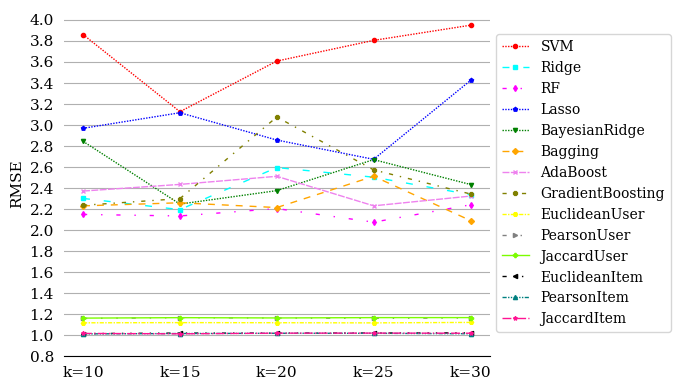

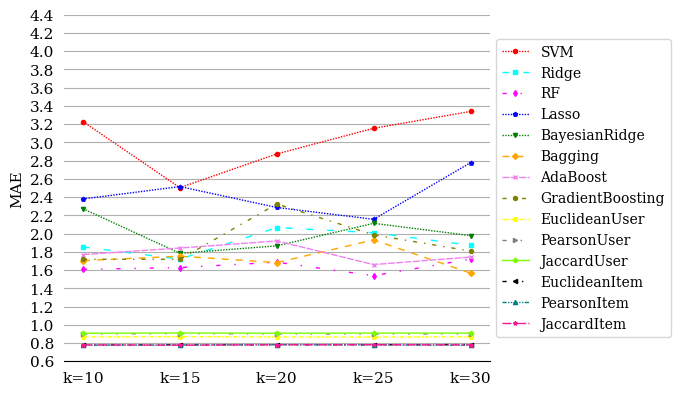

In [46]:
plot_course_based_clustering(course_cluster_reg, course_cluster_cb_user, course_cluster_cb_item)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


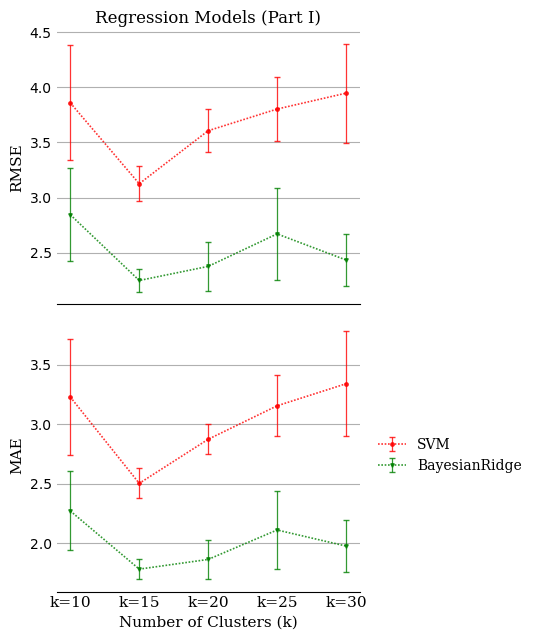

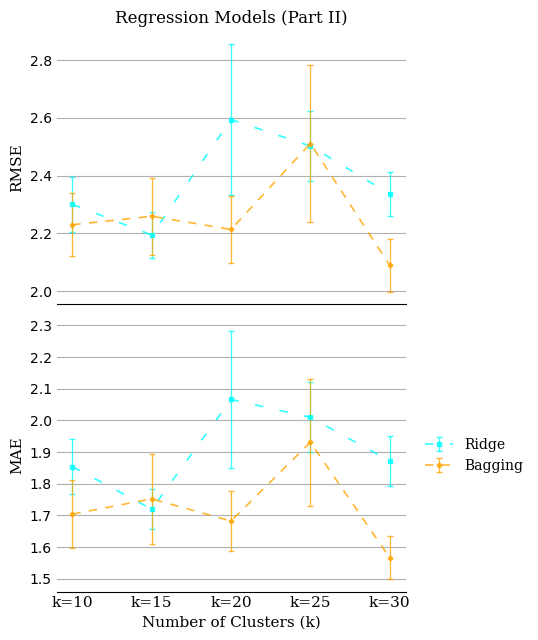

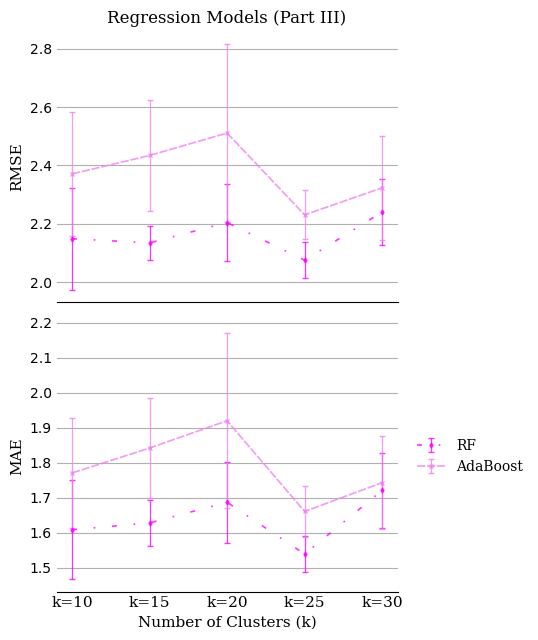

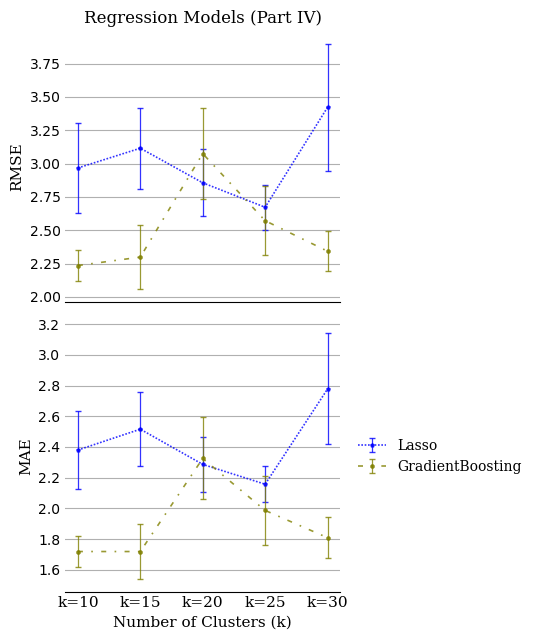

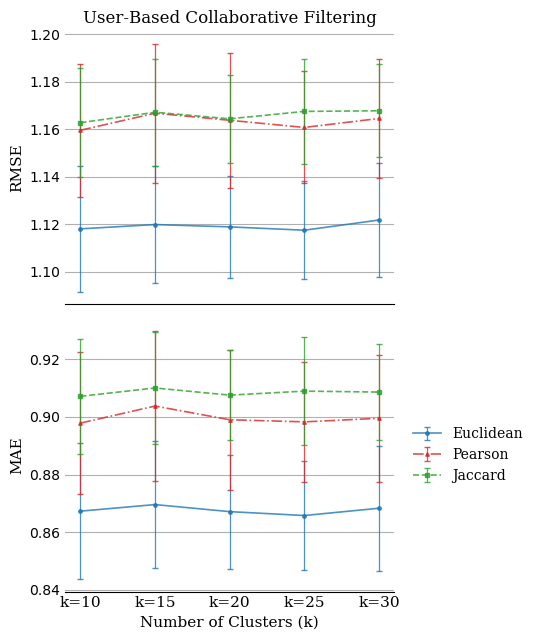

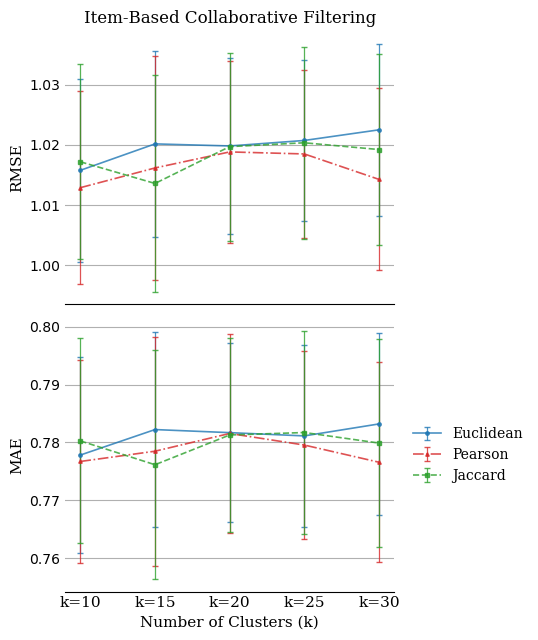

In [106]:
stats_data, fig_reg_1, fig_reg_2, fig_reg_3, fig_reg_4, fig_user, fig_item = \
    plot_student_based_clustering_separate(
        course_cluster_reg,
        course_cluster_cb_user,
        course_cluster_cb_item
    )

fig_reg_1.savefig("course_based_regression_clusters_part1.eps", dpi=1200, bbox_inches="tight")
fig_reg_2.savefig("course_based_regression_clusters_part2.eps", dpi=1200, bbox_inches="tight")
fig_reg_3.savefig("course_based_regression_clusters_part3.eps", dpi=1200, bbox_inches="tight")
fig_reg_4.savefig("course_based_regression_clusters_part4.eps", dpi=1200, bbox_inches="tight")
fig_user.savefig("course_based_user_cf_clusters.eps", dpi=1200, bbox_inches="tight")
fig_item.savefig("course_based_item_cf_clusters.eps", dpi=1200, bbox_inches="tight")

#### Course-based RMSE Wilcoxon Test

In [108]:
# --- AYARLAR ---
CHAMPION = 'Euclidean Distance_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Euclidean (User) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        71.026914  0.015625          YES
1                SVM  15        64.165610  0.015625          YES
2                SVM  20        68.974829  0.015625          YES
3                SVM  25        70.616661  0.015625          YES
4                SVM  30        71.581131  0.015625          YES
5                 RF  10        47.959385  0.015625          YES
6                 RF  15        47.520557  0.015625          YES
7                 RF  20        49.233954  0.015625          YES
8                 RF  25        46.139547  0.015625          YES
9                 RF  30        49.922699  0.015625          YES
10          AdaBoost  10        52.837612  0.015625          YES
11          AdaBoost  15        53.987934  0.015625          YES
12          AdaBoost  20        55.438423  0.015625          YES
13          AdaBoost  25        49.894403 

In [110]:
# --- AYARLAR ---
CHAMPION = 'Euclidean Distance_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Euclidean Distance_item (User) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        73.680079  0.015625          YES
1                SVM  15        67.359377  0.015625          YES
2                SVM  20        71.724915  0.015625          YES
3                SVM  25        73.163540  0.015625          YES
4                SVM  30        74.098870  0.015625          YES
5                 RF  10        52.724924  0.015625          YES
6                 RF  15        52.197827  0.015625          YES
7                 RF  20        53.733881  0.015625          YES
8                 RF  25        50.808044  0.015625          YES
9                 RF  30        54.359244  0.015625          YES
10          AdaBoost  10        57.156434  0.015625          YES
11          AdaBoost  15        58.088795  0.015625          YES
12          AdaBoost  20        59.388383  0.015625          YES
13          AdaBoost  25    

In [112]:
# --- AYARLAR ---
CHAMPION = 'Pearson Correlation_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Pearson (User) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        69.951665  0.015625          YES
1                SVM  15        62.665483  0.015625          YES
2                SVM  20        67.730458  0.015625          YES
3                SVM  25        69.479042  0.015625          YES
4                SVM  30        70.497971  0.015625          YES
5                 RF  10        46.028056  0.015625          YES
6                 RF  15        45.323622  0.015625          YES
7                 RF  20        47.197808  0.015625          YES
8                 RF  25        44.054261  0.015625          YES
9                 RF  30        48.014047  0.015625          YES
10          AdaBoost  10        51.087323  0.015625          YES
11          AdaBoost  15        52.061742  0.015625          YES
12          AdaBoost  20        53.651128  0.015625          YES
13          AdaBoost  25        47.954492  0

In [114]:
# --- AYARLAR ---
CHAMPION = 'Pearson Correlation_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Pearson Correlation_item (User) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        73.754707  0.015625          YES
1                SVM  15        67.487141  0.015625          YES
2                SVM  20        71.752274  0.015625          YES
3                SVM  25        73.222384  0.015625          YES
4                SVM  30        74.307127  0.015625          YES
5                 RF  10        52.858968  0.015625          YES
6                 RF  15        52.384937  0.015625          YES
7                 RF  20        53.778648  0.015625          YES
8                 RF  25        50.915907  0.015625          YES
9                 RF  30        54.726216  0.015625          YES
10          AdaBoost  10        57.277913  0.015625          YES
11          AdaBoost  15        58.252845  0.015625          YES
12          AdaBoost  20        59.427678  0.015625          YES
13          AdaBoost  25   

In [116]:
# --- AYARLAR ---
CHAMPION = 'Jaccard Index_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Jaccard (User) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        69.868560  0.015625          YES
1                SVM  15        62.652843  0.015625          YES
2                SVM  20        67.713344  0.015625          YES
3                SVM  25        69.301535  0.015625          YES
4                SVM  30        70.415873  0.015625          YES
5                 RF  10        45.878785  0.015625          YES
6                 RF  15        45.305110  0.015625          YES
7                 RF  20        47.169805  0.015625          YES
8                 RF  25        43.728886  0.015625          YES
9                 RF  30        47.869382  0.015625          YES
10          AdaBoost  10        50.952044  0.015625          YES
11          AdaBoost  15        52.045511  0.015625          YES
12          AdaBoost  20        53.626547  0.015625          YES
13          AdaBoost  25        47.651800  0

In [118]:
# --- AYARLAR ---
CHAMPION = 'Jaccard Index_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_rmse(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Jaccard Index_item (User) vs All Regression RMSE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        73.643455  0.015625          YES
1                SVM  15        67.569467  0.015625          YES
2                SVM  20        71.727916  0.015625          YES
3                SVM  25        73.173645  0.015625          YES
4                SVM  30        74.181697  0.015625          YES
5                 RF  10        52.659141  0.015625          YES
6                 RF  15        52.505503  0.015625          YES
7                 RF  20        53.738793  0.015625          YES
8                 RF  25        50.826567  0.015625          YES
9                 RF  30        54.505194  0.015625          YES
10          AdaBoost  10        57.096818  0.015625          YES
11          AdaBoost  15        58.358554  0.015625          YES
12          AdaBoost  20        59.392694  0.015625          YES
13          AdaBoost  25        5

#### Course-based MAE Wilcoxon Test

In [120]:
# --- AYARLAR ---
CHAMPION = 'Euclidean Distance_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Euclidean (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        73.136399  0.015625          YES
1                SVM  15        65.275159  0.015625          YES
2                SVM  20        69.830387  0.015625          YES
3                SVM  25        72.558791  0.015625          YES
4                SVM  30        74.002896  0.015625          YES
5                 RF  10        46.063975  0.015625          YES
6                 RF  15        46.571181  0.015625          YES
7                 RF  20        48.587145  0.015625          YES
8                 RF  25        43.724652  0.015625          YES
9                 RF  30        49.533683  0.015625          YES
10          AdaBoost  10        51.011044  0.015625          YES
11          AdaBoost  15        52.786258  0.015625          YES
12          AdaBoost  20        54.830910  0.015625          YES
13          AdaBoost  25        47.854553  

In [122]:
# --- AYARLAR ---
CHAMPION = 'Euclidean Distance_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Euclidean Distance_item (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        75.907275  0.015625          YES
1                SVM  15        68.763186  0.015625          YES
2                SVM  20        72.802561  0.015625          YES
3                SVM  25        75.241594  0.015625          YES
4                SVM  30        76.550812  0.015625          YES
5                 RF  10        51.627267  0.015625          YES
6                 RF  15        51.937978  0.015625          YES
7                 RF  20        53.652108  0.015625          YES
8                 RF  25        49.226439  0.015625          YES
9                 RF  30        54.479769  0.015625          YES
10          AdaBoost  10        56.064065  0.015625          YES
11          AdaBoost  15        57.528765  0.015625          YES
12          AdaBoost  20        59.280765  0.015625          YES
13          AdaBoost  25     

In [130]:
# --- AYARLAR ---
CHAMPION = 'Pearson Correlation_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Pearson (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        72.190683  0.015625          YES
1                SVM  15        63.910443  0.015625          YES
2                SVM  20        68.721640  0.015625          YES
3                SVM  25        71.529146  0.015625          YES
4                SVM  30        73.068885  0.015625          YES
5                 RF  10        44.165192  0.015625          YES
6                 RF  15        44.471384  0.015625          YES
7                 RF  20        46.697699  0.015625          YES
8                 RF  25        41.613096  0.015625          YES
9                 RF  30        47.720554  0.015625          YES
10          AdaBoost  10        49.286419  0.015625          YES
11          AdaBoost  15        50.930718  0.015625          YES
12          AdaBoost  20        53.170925  0.015625          YES
13          AdaBoost  25        45.897959  0.

In [132]:
# --- AYARLAR ---
CHAMPION = 'Pearson Correlation_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Pearson Correlation_item (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        75.941542  0.015625          YES
1                SVM  15        68.912293  0.015625          YES
2                SVM  20        72.807549  0.015625          YES
3                SVM  25        75.291611  0.015625          YES
4                SVM  30        76.748641  0.015625          YES
5                 RF  10        51.696067  0.015625          YES
6                 RF  15        52.167399  0.015625          YES
7                 RF  20        53.660608  0.015625          YES
8                 RF  25        49.329012  0.015625          YES
9                 RF  30        54.863800  0.015625          YES
10          AdaBoost  10        56.126555  0.015625          YES
11          AdaBoost  15        57.731499  0.015625          YES
12          AdaBoost  20        59.288233  0.015625          YES
13          AdaBoost  25    

In [134]:
# --- AYARLAR ---
CHAMPION = 'Jaccard Index_user' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Jaccard (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        71.902535  0.015625          YES
1                SVM  15        63.660293  0.015625          YES
2                SVM  20        68.424434  0.015625          YES
3                SVM  25        71.191260  0.015625          YES
4                SVM  30        72.796587  0.015625          YES
5                 RF  10        43.586656  0.015625          YES
6                 RF  15        44.086494  0.015625          YES
7                 RF  20        46.191223  0.015625          YES
8                 RF  25        40.920173  0.015625          YES
9                 RF  30        47.191960  0.015625          YES
10          AdaBoost  10        48.760948  0.015625          YES
11          AdaBoost  15        50.590600  0.015625          YES
12          AdaBoost  20        52.725957  0.015625          YES
13          AdaBoost  25        45.255887  0.

In [136]:
# --- AYARLAR ---
CHAMPION = 'Jaccard Index_item' # Senin en iyi modelin

# Tüm eski rakipler listesi
RAKIPLER = [
    'SVR', 
    'RandomForestRegressor', 
    'AdaBoostRegressor', 
    'GradientBoostingRegressor', 
    'BaggingRegressor', 
    'Ridge', 
    'Lasso', 
    'BayesianRidge'
]

K_DEGERLERI = [10, 15, 20, 25, 30]

# Çalıştır
df_big_comparison = compare_champion_vs_all_user_mae(stats_data, CHAMPION, RAKIPLER, K_DEGERLERI)

# Çıktıyı daha okunaklı görelim (Sadece önemli sütunlar)
pd.set_option('display.max_rows', 100) # Tüm satırları göster
display_cols = ['Opponent', 'k', 'Improvement (%)', 'P-Value', 'Significant?']
print(df_big_comparison[display_cols])

--- Jaccard Index_item (User) vs All Regression MAE ---
            Opponent   k  Improvement (%)   P-Value Significant?
0                SVM  10        75.831629  0.015625          YES
1                SVM  15        69.005438  0.015625          YES
2                SVM  20        72.816696  0.015625          YES
3                SVM  25        75.223053  0.015625          YES
4                SVM  30        76.649635  0.015625          YES
5                 RF  10        51.475387  0.015625          YES
6                 RF  15        52.310715  0.015625          YES
7                 RF  20        53.676195  0.015625          YES
8                 RF  25        49.188414  0.015625          YES
9                 RF  30        54.671607  0.015625          YES
10          AdaBoost  10        55.926115  0.015625          YES
11          AdaBoost  15        57.858144  0.015625          YES
12          AdaBoost  20        59.301927  0.015625          YES
13          AdaBoost  25        52

### Comparison with the state of the art

In [ ]:
with open('../results/nn_results.json') as fr:
    nn = json.load(fr)    

In [5]:
with open('../results/naive_bayes_results.json') as fr:
    nb = json.load(fr)    

In [71]:
with open('../results/2017 paper.json') as fr:
    cb_2017 = json.load(fr)    

In [22]:
with open('proposed_method_clean.json') as fr:
    cf_2026 = json.load(fr)    

In [48]:
# guncel 
with open('../results/nn_results.json') as fr:
    nn = json.load(fr) 


with open('../results/naive_bayes_results.json') as fr:
    nb = json.load(fr) 

with open('../results/2017 paper.json') as fr:
    cb_2017 = json.load(fr) 

with open('proposed_method_clean.json') as fr:
    cf_2026 = json.load(fr)  


In [65]:
import json
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

def convert_to_benchmark_format(input_data, model_name="Proposed Method"):
    """
    JSON çıktısını benchmark formatına çevirir ve kullanılan metriği de ekler.
    """
    # 1. Metriği Yakala (Zaten yapıyorduk, şimdi kullanacağız)
    sim_metric = list(input_data.keys())[0] 
    clusters_data = input_data[sim_metric]
    
    # 2. En İyi k Değerini Bul
    best_k = None
    min_global_rmse = float('inf')
    
    for k_val in clusters_data:
        all_true = []
        all_pred = []
        for sem in clusters_data[k_val]:
            all_true.extend(clusters_data[k_val][sem]['y_true'])
            all_pred.extend(clusters_data[k_val][sem]['y_pred'])
            
        if not all_true: continue
            
        rmse = np.sqrt(mean_squared_error(all_true, all_pred))
        if rmse < min_global_rmse:
            min_global_rmse = rmse
            best_k = k_val
            
    # --- BURASI GÜNCELLENDİ (Bilgi Veriyoruz) ---
    print(f"Algılanan Metrik: {sim_metric}")  # <--- Hangi metrik olduğunu yazar
    print(f"En iyi sonuç veren parametre: k={best_k} (RMSE: {min_global_rmse:.4f})")
    
    # 3. İstenilen Formata Dönüştür
    # Model isminin yanına metriği de ekleyelim ki karışmasın
    final_model_name = f"{model_name} ({sim_metric})"
    
    formatted_output = {final_model_name: {}}
    
    target_data = clusters_data[best_k] 
    
    for sem_id, results in target_data.items():
        y_true = results['y_true']
        y_pred = results['y_pred']
        
        if not y_true:
            formatted_output[final_model_name][sem_id] = {"rmse": [0.0, 0.0], "mae": [0.0, 0.0]}
            continue
            
        rmse_val = np.sqrt(mean_squared_error(y_true, y_pred))
        mae_val = mean_absolute_error(y_true, y_pred)
        
        formatted_output[final_model_name][sem_id] = {
            "rmse": [0.0, rmse_val],
            "mae":  [0.0, mae_val]
        }
        
    return formatted_output

# --- KULLANIM ---
# file_path = '../experiments/clustering_item_based_collaborative_filtering_results (Student based with KMeans).json'
file_path = '../experiments/k_testi.json'

try:
    with open(file_path, 'r') as f:
        my_raw_data = json.load(f)

    # Fonksiyonu çağır
    clean_json = convert_to_benchmark_format(my_raw_data, model_name="Proposed Method")

    print("\n--- SONUÇ ---")
    # Çıktıda artık "Proposed Method (Euclidean Distance)" yazacak
    print(json.dumps(clean_json, indent=4))
    
    with open('proposed_method_clean.json', 'w') as fw:
        json.dump(clean_json, fw, indent=4)

except FileNotFoundError:
    print("Dosya bulunamadı.")

Algılanan Metrik: Euclidean Distance
En iyi sonuç veren parametre: k=15 (RMSE: 1.0096)

--- SONUÇ ---
{
    "Proposed Method (Euclidean Distance)": {
        "1": {
            "rmse": [
                0.0,
                0.933374821542338
            ],
            "mae": [
                0.0,
                0.6669946697856965
            ]
        },
        "2": {
            "rmse": [
                0.0,
                1.066895987245206
            ],
            "mae": [
                0.0,
                0.8039949483460984
            ]
        },
        "3": {
            "rmse": [
                0.0,
                0.9914205274255727
            ],
            "mae": [
                0.0,
                0.7582565800331743
            ]
        },
        "4": {
            "rmse": [
                0.0,
                1.0256404124489156
            ],
            "mae": [
                0.0,
                0.7924294839329385
            ]
        },
        "5":

In [67]:
import matplotlib.pyplot as plt
import numpy as np

def plot_final_comparison(nn, nb, cb_2017, cf_2026):
    """
    4 farklı JSON kaynağından verileri okur, format farklarını içeride halleder
    ve SOTA karşılaştırma grafiği çizer.
    """
    final_scores = {}
    
    # --- 1. CB 2017 (Liste Formatı) ---
    # Format: {"Euclidean Distance": {"rmse": [1.01, 1.11, ...]}}
    try:
        cb_list = cb_2017['Euclidean Distance']['rmse']
        final_scores['CB - Cakmak\n(2017)'] = np.mean(cb_list)
    except KeyError:
        print("UYARI: CB 2017 formatı beklenenden farklı!")

    # --- YARDIMCI FONKSİYON: DİĞER MODELLERİ İŞLEME ---
    # Format: {"ModelName": {"1": {"rmse": [train, test]}, "2": ...}}
    def process_standard_format(data_dict, custom_name=None):
        for model_key, semesters in data_dict.items():
            test_errors = []
            for sem_id, stats in semesters.items():
                # stats['rmse'] -> [train_rmse, test_rmse]
                # Biz test hatasını (index 1) alıyoruz
                if len(stats['rmse']) > 1:
                    test_errors.append(stats['rmse'][1])
                else:
                    test_errors.append(stats['rmse'][0]) # Tek değer varsa
            
            # İsimlendirme
            if custom_name:
                display_name = custom_name
            else:
                # GNB ve MNB için mapping
                if model_key == 'GaussianNB': display_name = 'GNB - Mimis\net al.'
                elif model_key == 'MultinomialNB': display_name = 'MNB - Mimis\net al.'
                elif model_key == 'NN': display_name = 'NN - Mimis\net al.'
                else: display_name = model_key
            
            if test_errors:
                final_scores[display_name] = np.mean(test_errors)

    # --- 2. NN, NB ve CF_2026 İŞLEME ---
    process_standard_format(nn)
    process_standard_format(nb)
    # Senin modeline özel isim veriyoruz
    process_standard_format(cf_2026, custom_name="Proposed Method\n(2026)")

    # --- 3. GRAFİK ÇİZİMİ ---
    if not final_scores:
        print("Çizilecek veri bulunamadı.")
        return

    # Sıralama (Küçükten büyüğe - En iyi en solda)
    sorted_items = sorted(final_scores.items(), key=lambda x: x[1])
    models = [item[0] for item in sorted_items]
    scores = [item[1] for item in sorted_items]

    # Renk Ayarı: Proposed Method Kırmızı, Diğerleri Mavi
    colors = []
    for m in models:
        if "Proposed" in m:
            colors.append('#C44E52') # Kiremit Kırmızısı (Vurgu)
        else:
            colors.append('#4C72B0') # Standart Mavi

    # Plot Ayarları
    fig, ax = plt.subplots(figsize=(10, 5))
    bars = ax.bar(models, scores, color=colors, width=0.6, edgecolor='black', linewidth=0.7)

    # Değerleri Yazma
    y_max = max(scores)
    offset = y_max * 0.02
    
    for bar, score in zip(bars, scores):
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width()/2, 
            height + offset, 
            f"{score:.3f}", 
            ha='center', va='bottom', 
            fontsize=12, fontweight='bold', fontfamily='serif'
        )

    # Eksen ve Stil
    ax.set_ylabel("RMSE", fontsize=12, fontfamily='serif')
    # ax.set_title("Performance Comparison (RMSE)", fontsize=14, fontfamily='serif', pad=15)
    
    ax.set_xticklabels(models, rotation=0, fontsize=10, fontfamily='serif')
    ax.set_ylim(0, y_max * 1.15)
    
    # Temizlik
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.savefig('final_sota_comparison.eps', format='eps', dpi=1200)
    print("Grafik 'final_sota_comparison.eps' olarak kaydedildi.")
    plt.show()

/var/folders/s7/jgc_z9fj1tq65hb0wg4tr7lm0000gn/T/ipykernel_4807/3829436470.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(models, rotation=0, fontsize=10, fontfamily='serif')
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Grafik 'final_sota_comparison.eps' olarak kaydedildi.


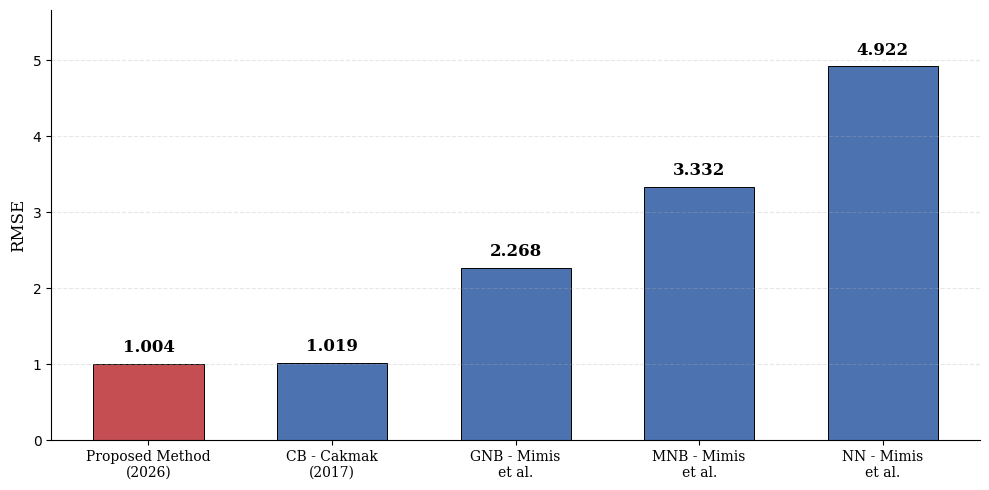

In [68]:
# Örnek Kullanım
plot_final_comparison(nn, nb, cb_2017, cf_2026)

In [69]:
import matplotlib.pyplot as plt
import numpy as np

def plot_final_comparison_styled(nn, nb, cb_2017, cf_2026, metric="RMSE"):
    """
    Verileri senin kaynaklarından okur, 'plot_sota_styled' fonksiyonunun
    modern stilini kullanır. 
    ÖNEMLİ: 'CF - Ibrahimzada et al. (2026)' modeli her zaman EN BAŞTA yer alır.
    """
    final_scores = {}
    
    # --- 1. VERİ İŞLEME ---
    
    # CB 2017 İşleme
    try:
        if metric.lower() == 'rmse':
            cb_list = cb_2017['Euclidean Distance']['rmse']
        else: # MAE
            cb_list = cb_2017['Euclidean Distance']['mae']
        final_scores['CB - Cakmak\n(2017)'] = np.mean(cb_list)
    except KeyError:
        print("UYARI: CB 2017 formatı beklenenden farklı!")

    # Diğer Modelleri İşleme
    def process_standard_format(data_dict, custom_name=None):
        for model_key, semesters in data_dict.items():
            test_errors = []
            for sem_id, stats in semesters.items():
                metric_key = 'rmse' if 'rmse' in stats else 'mae'
                if metric.lower() in stats:
                     metric_key = metric.lower()
                
                if len(stats[metric_key]) > 1:
                    test_errors.append(stats[metric_key][1])
                else:
                    test_errors.append(stats[metric_key][0])
            
            if custom_name:
                display_name = custom_name
            else:
                if model_key == 'GaussianNB': display_name = 'GNB - Mimis\net al.'
                elif model_key == 'MultinomialNB': display_name = 'MNB - Mimis\net al.'
                elif model_key == 'NN': display_name = 'NN - Mimis\net al.'
                else: display_name = model_key
            
            if test_errors:
                final_scores[display_name] = np.mean(test_errors)

    # Verileri Çek (Bizim modelin adı burada belirleniyor)
    target_name = "CF - Ibrahimzada\n et al. (2026)"
    process_standard_format(nn)
    process_standard_format(nb)
    process_standard_format(cf_2026, custom_name=target_name)

    # --- 2. ÇİZİM (Sıralama Değişikliği Buraya Eklendi) ---
    if not final_scores:
        print("Çizilecek veri bulunamadı.")
        return

    # A) Önce herkesi skoruna göre (Küçükten Büyüğe) sırala
    sorted_by_score = sorted(final_scores.items(), key=lambda x: x[1])
    
    # B) Bizim modeli bul ve listenin en başına al
    proposed_item = None
    others = []
    
    for item in sorted_by_score:
        if item[0] == target_name:
            proposed_item = item
        else:
            others.append(item)
            
    # C) Yeni Listeyi Oluştur: [Bizimki] + [Diğerleri Sıralı]
    if proposed_item:
        final_sorted_items = [proposed_item] + others
    else:
        final_sorted_items = others # Bulamazsa normal kalsın
        
    labels_sorted = [item[0] for item in final_sorted_items]
    values_sorted = [item[1] for item in final_sorted_items]

    # Renk Paleti (Sıraya göre renk atama)
    color_palette = ['#4C72B0', '#55A868', '#79cdcd', '#F1C40F', '#F39C12', '#E74C3C']
    current_colors = color_palette[:len(values_sorted)]
    
    x = np.arange(len(labels_sorted))
    
    # Çizim Başlat
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Barları Çiz
    bars = ax.bar(x, values_sorted, color=current_colors, width=0.6)
    
    # Değerleri Yaz
    max_val = max(values_sorted) if values_sorted else 1
    offset = max_val * 0.02
    
    for i, val in enumerate(values_sorted):
        ax.text(
            x[i], 
            val + offset, 
            f"{val:.2f}", 
            ha='center', va='bottom', 
            fontsize=11, fontweight='bold', color='black'
        )
    
    # Eksen ve Stil Ayarları
    ax.set_ylabel(metric.upper(), fontsize=12)
    ax.set_ylim(0, max_val * 1.15) 
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels_sorted, rotation=0, ha='center', fontsize=10)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    plt.tight_layout()
    
    filename = f"Final_SOTA_Comparison_{metric}.eps"
    plt.savefig(filename, format="eps", bbox_inches='tight')
    print(f"Grafik kaydedildi: {filename}")
    plt.show()

Grafik kaydedildi: Final_SOTA_Comparison_RMSE.eps


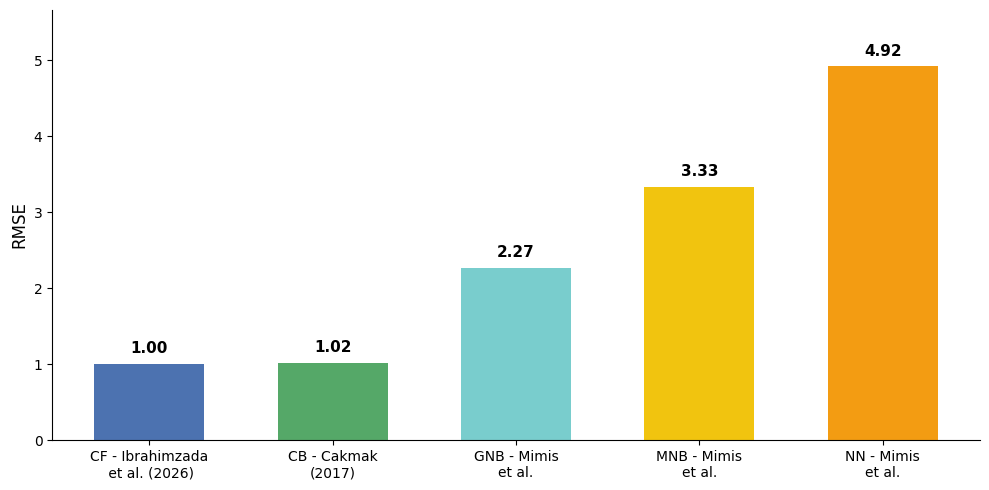

Grafik kaydedildi: Final_SOTA_Comparison_MAE.eps


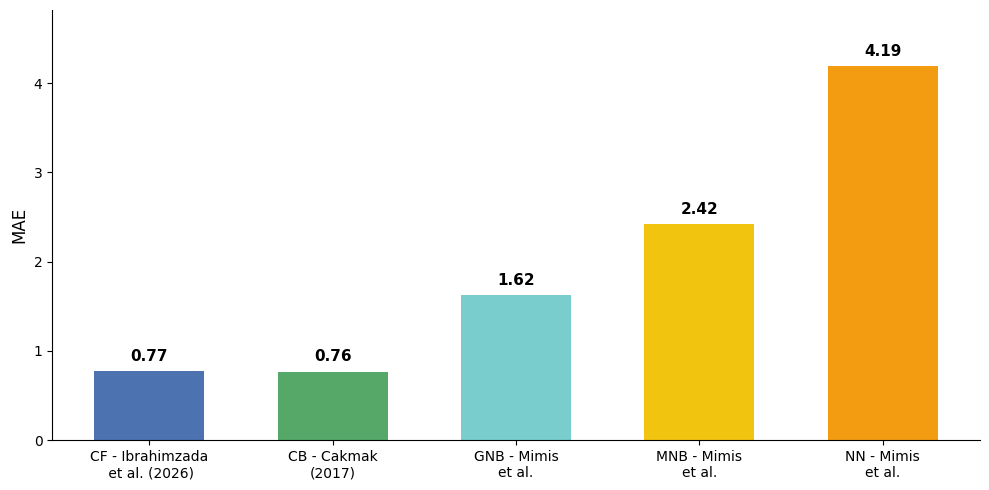

In [70]:
# RMSE Grafiği
plot_final_comparison_styled(nn, nb, cb_2017, cf_2026, metric="RMSE")

# MAE Grafiği (Eğer dosyalarda MAE verisi varsa)
plot_final_comparison_styled(nn, nb, cb_2017, cf_2026, metric="MAE")

In [23]:
def plot_state_of_the_art(nn, nb, cb_2017):
    min_rmse = {}
    mapper = {'GaussianNB': 'GNB', 'MultinomialNB': 'MNB', 'NN': 'NN'}
    
    paper_2017 = np.mean(cb_2017['Euclidean Distance']['rmse'])
    min_rmse['CB - Cakmak \n (2017)'] = paper_2017
    min_rmse['CF - Ibrahimzada \n & Cakmak (2026)'] = np.mean([0.633074917194508, 1.041429064469834, 1.1003646982413615, 0.9955917352578884,
                                                            1.0397191561120847, 1.1105777153699117, 0.8548291876407343])
    
    nb.update(nn)
    for model in nb:
        model_name = mapper[model] + ' - Mimis \n et al. (2019)'
        min_rmse.setdefault(model_name, 100)
        min_rmse[model_name] = np.mean([nb[model][n_training_semesters]['rmse'][1]
                                       for n_training_semesters in nb[model]])
    
    min_rmse = {k: v for k, v in sorted(min_rmse.items(), key=lambda item: item[1])}
    model_names = list(min_rmse.keys())
    x = np.arange(len(model_names))
    fig, ax = plt.subplots(figsize=(10, 6))
    
    color_palette = ['#4C72B0', '#55A868', '#79cdcd', '#F1C40F', '#F39C12', '#E74C3C']
    for i in range(len(model_names)):
        ax.bar(i, min_rmse[model_names[i]], width=0.6, label=model_names[i], color=color_palette[i])
    
    for i, v in enumerate(min_rmse.values()):
        ax.text(i-0.14, v + 0.1, str(round(v, 2)), fontfamily='serif', fontsize=11, fontweight='bold')
    
    ax.set_ylabel('RMSE', fontfamily='serif', fontsize=11)
    ax.set_yticks(range(8))
    ax.set_yticklabels([i for i in range(8)], fontfamily='serif', fontsize=11)
    ax.set_xticks(x)
    ax.set_xticklabels(model_names, rotation=0, ha='center', fontsize=10)
    right_side = ax.spines["right"]
    right_side.set_visible(False)
    left_side = ax.spines["left"]
    left_side.set_visible(False)
    top_side = ax.spines["top"]
    top_side.set_visible(False)     

    ax.tick_params(axis = "y", which = "both", left = False, right = False)        
    plt.savefig('state of the art.eps', bbox_inches='tight', dpi=1200)

In [24]:
plot_state_of_the_art(nn, nb, cb_2017)

KeyError: 'rmse'

# no fallback icin 

Grafik kaydedildi: ./SOTA_Comparison_RMSE_Styled.eps


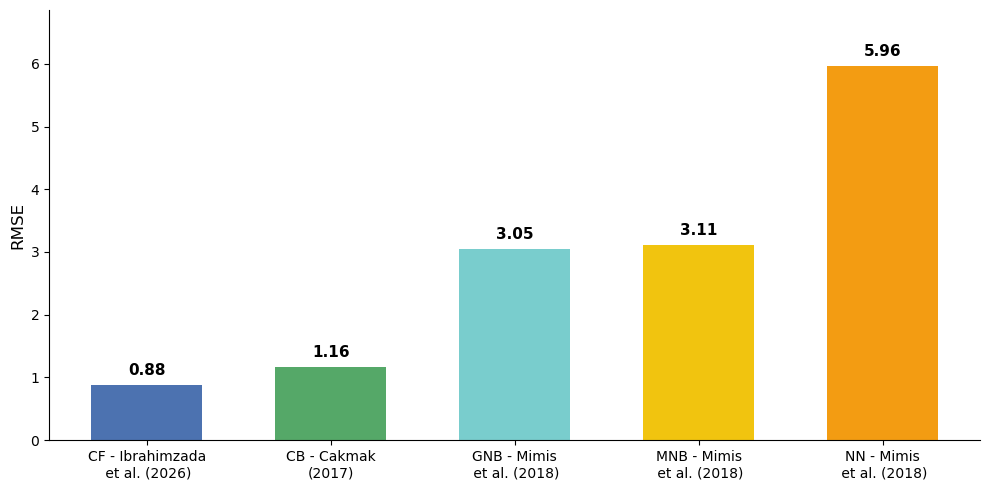

Grafik kaydedildi: ./SOTA_Comparison_MAE_Styled.eps


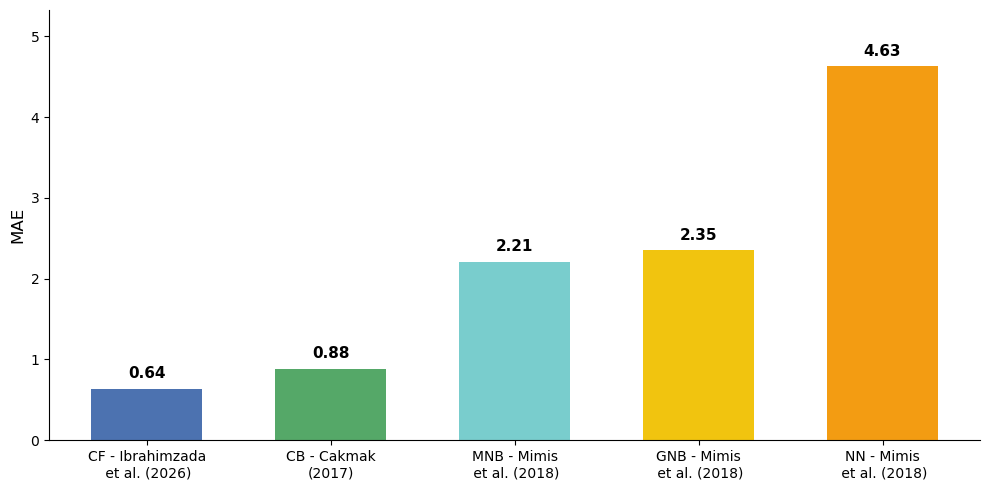

In [ ]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np

# --- AYARLAR ---
RESULTS_DIR = "../results/"

# JSON Dosyası -> Grafikte Görünecek Etiket
# (Satır atlatmak için \n kullanıyoruz)
model_map = {
    "results_cluster_cf_subset.json": "CF - Ibrahimzada\n et al. (2026)",
    "results_2017_subset.json":       "CB - Cakmak\n(2017)",
    "results_gnb_subset.json":        "GNB - Mimis\n et al. (2019)",
    "results_mnb_subset.json":        "MNB - Mimis\n et al. (2019)",
    "results_nn_subset.json":         "NN - Mimis\n et al. (2019)"
}

# Senin stilindeki renkler (Sıralamadan bağımsız modele sabit renk atamak istersen burayı kullan)
# Veya senin kodundaki gibi sıralamaya göre otomatik renk atayabiliriz.
# Şimdilik senin kodundaki renk paletini kullanıyorum:
color_palette = ['#4C72B0', '#55A868', '#79cdcd', '#F1C40F', '#F39C12', '#E74C3C']

def load_results():
    data = []
    for filename, display_name in model_map.items():
        filepath = os.path.join(RESULTS_DIR, filename)
        if os.path.exists(filepath):
            with open(filepath, 'r') as f:
                res = json.load(f)
                data.append({
                    "Model": display_name,
                    "RMSE": res.get("RMSE", 0),
                    "MAE": res.get("MAE", 0)
                })
        else:
            print(f"UYARI: {filename} bulunamadı!")
    return data

def plot_sota_styled(data, metric="RMSE"):
    # 1. Veriyi Sırala (Küçükten Büyüğe)
    # zip ile veriyi eşleştirip sıralıyoruz
    sorted_data = sorted(data, key=lambda x: x[metric])
    
    # Sıralanmış listeleri ayır
    labels_sorted = [d["Model"] for d in sorted_data]
    values_sorted = [d[metric] for d in sorted_data]
    
    # Renkleri Belirle (Proposed model her zaman farklı renk olsun dersen buraya if koyabiliriz)
    # Şimdilik senin paletinden sırasıyla renk alıyoruz (En iyi sonuç -> İlk renk)
    # Veya model bazlı sabit renk için:
    # colors_sorted = [colors_map.get(lbl, '#333333') for lbl in labels_sorted]
    
    # Senin stilindeki gibi soldan sağa renk paleti:
    current_colors = color_palette[:len(values_sorted)]
    
    x = np.arange(len(labels_sorted))
    
    # 2. Çizim Başlat
    fig, ax = plt.subplots(figsize=(10, 5))
    
    # Barları Çiz
    bars = ax.bar(x, values_sorted, color=current_colors, width=0.6)
    
    # 3. Değerleri Yaz (Annotation)
    # Y ekseninin max değerine göre ofset (boşluk) ayarla
    max_val = max(values_sorted) if values_sorted else 1
    offset = max_val * 0.02 # %2 boşluk
    
    for i, val in enumerate(values_sorted):
        ax.text(
            x[i], 
            val + offset, 
            f"{val:.2f}", # 2 hane hassasiyet (SOTA için iyidir)
            ha='center', va='bottom', 
            fontsize=11, fontweight='bold', color='black'
        )
    
    # 4. Eksen ve Stil Ayarları
    ax.set_ylabel(f"{metric}", fontsize=12)
    
    # Y eksenini biraz yukarıdan bitir ki text sığsın
    ax.set_ylim(0, max_val * 1.15) 
    
    # X Eksen Etiketleri
    ax.set_xticks(x)
    ax.set_xticklabels(labels_sorted, rotation=0, ha='center', fontsize=10)
    
    # Sadece Y ekseninde Grid olsun mu? (Senin stilinde yoktu ama değer okumayı kolaylaştırır)
    # ax.grid(axis='y', linestyle='--', alpha=0.3) 
    
    # Spines (Çerçeveler) - Senin stilindeki gibi üst ve sağı kaldır
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Başlık (Opsiyonel - Makalede genelde caption olur, grafik başlığı olmaz)
    # ax.set_title(...) 
    
    plt.tight_layout()
    
    # Kaydet
    filename = f"./SOTA_Comparison_{metric}_Styled.eps"
    plt.savefig(filename, format="eps", bbox_inches='tight')
    print(f"Grafik kaydedildi: {filename}")
    plt.show()

# --- ÇALIŞTIR ---
results_data = load_results()

if results_data:
    plot_sota_styled(results_data, metric="RMSE")
    plot_sota_styled(results_data, metric="MAE")
else:
    print("Veri yok.")